In [1]:
from preprocessing_last20 import *
from encoder import Encoder
from decoder import Decoder
import torch.optim as optim

device = torch.device('cuda:3')
# device = torch.device('cpu')
encoder = Encoder().to(device) # input 64*64 image, output 128 feacture vector
decoder = Decoder().to(device) # input 128 feature vector, output 64*64 image

train_data = train_data.to(device)
test_data = test_data.to(device)

In [2]:
train_data.shape

torch.Size([200, 1, 1, 64, 64])

In [46]:
def train_VAE_1ep(encoder, decoder, optimizer_e, optimizer_d, epoch):  
#     gan_input = torch.normal(0, 1, size=(1,1,64, 64)) # noise
    encoder.train()
    decoder.train()
    ep_loss = 0
    for i in range(train_data.shape[0]):
        optimizer_e.zero_grad()
        optimizer_d.zero_grad()
        z = torch.sum((train_data[i] - decoder(encoder(train_data[i])))**2)
        loss=z
        loss.backward()
        optimizer_e.step()
        optimizer_d.step()
        ep_loss += loss.item()
    if epoch%20 == 0:
        tensor_to_picture(decoder(encoder(train_data[0])).detach().cpu().numpy()[0][0])
    return ep_loss/train_data.shape[0]

def test_VAE(encoder, decoder):  
#     gan_input = torch.normal(0, 1, size=(1,1,64, 64)) # noise
    encoder.eval()
    decoder.eval()
    ep_loss = 0
    for i in range(test_data.shape[0]):
        z = torch.sum((test_data[i] - decoder(encoder(test_data[i])))**2)
        loss=z
        ep_loss += loss.item()
    tensor_to_picture(decoder(encoder(test_data[0])).detach().cpu().numpy()[0][0])
    print("test loss: ", ep_loss/test_data.shape[0])



def train_VAE(eps, lr, reg, lr_decay):
    for epoch in range(eps): 
        optimizer_e = optim.SGD(encoder.parameters(), lr=lr*lr_decay**epoch, momentum=0.9, weight_decay=reg, nesterov=False)
        optimizer_d = optim.SGD(decoder.parameters(), lr=lr*lr_decay**epoch, momentum=0.9, weight_decay=reg, nesterov=False)
        epoch_loss = train_VAE_1ep(encoder, decoder, optimizer_e, optimizer_d, epoch)
        print("loss(generator): ", epoch_loss)
        if epoch%10 == 0:
            test_VAE(encoder, decoder)

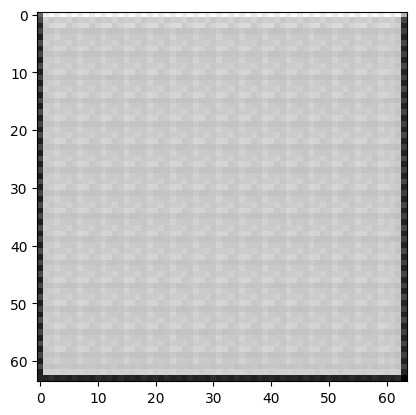

loss(generator):  3904.2834851074217


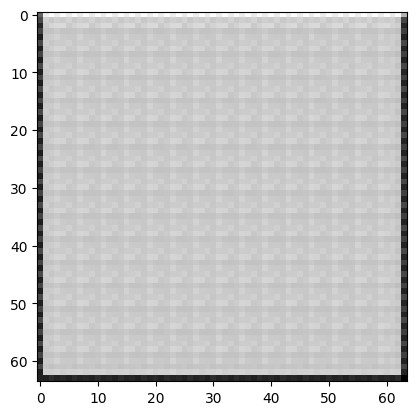

test loss:  3775.8938372802736
loss(generator):  3886.9573754882813
loss(generator):  3841.834895629883
loss(generator):  3788.4059741210935
loss(generator):  3733.0495947265626
loss(generator):  3669.373504638672
loss(generator):  3636.0154791259765
loss(generator):  3366.9523138427735
loss(generator):  3069.3981970214845
loss(generator):  2600.857639770508
loss(generator):  2173.2509582519533


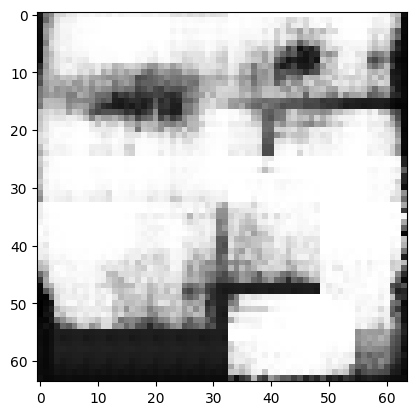

test loss:  2114.447410888672
loss(generator):  2046.144753112793
loss(generator):  1850.4159655761719
loss(generator):  1821.6954669189454
loss(generator):  1756.9015612792969
loss(generator):  1737.821284790039
loss(generator):  1699.1185931396485
loss(generator):  1769.0479364013672
loss(generator):  1613.3989553833007
loss(generator):  1584.2323889160157


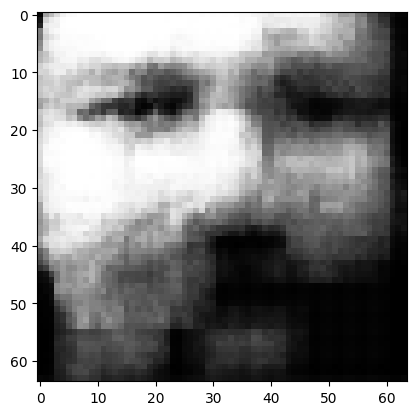

loss(generator):  1554.2810833740234


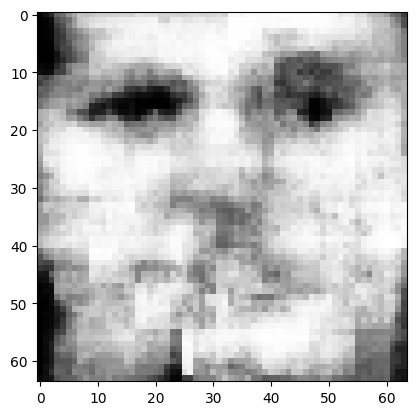

test loss:  1519.1370166015624
loss(generator):  1531.5623287963867
loss(generator):  1476.2749954223632
loss(generator):  1506.0255261230468
loss(generator):  1515.3486679077148
loss(generator):  1486.5096600341797
loss(generator):  1505.8168585205078
loss(generator):  1468.9988177490234
loss(generator):  1457.964189453125
loss(generator):  1442.7507736206055


In [4]:
train_VAE(30, 0.00001, 0.00001, 1)

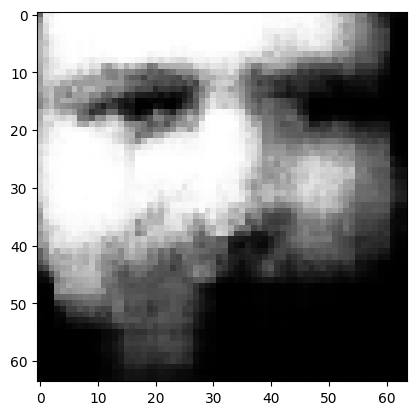

loss(generator):  1430.3884030151366


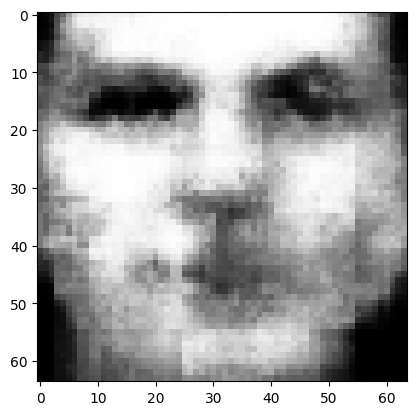

test loss:  1400.1801721191407
loss(generator):  1407.5557391357422
loss(generator):  1373.8148297119142
loss(generator):  1383.6003115844726
loss(generator):  1407.243660888672
loss(generator):  1466.4650378417969
loss(generator):  1434.3931103515624
loss(generator):  1382.8046591186524
loss(generator):  1344.538773803711
loss(generator):  1324.9402905273437
loss(generator):  1316.2274829101561


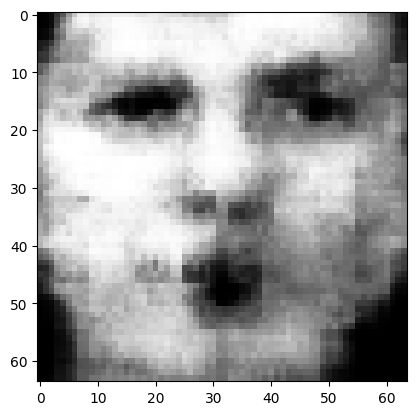

test loss:  1336.179992980957
loss(generator):  1315.287071533203
loss(generator):  1320.6346844482423
loss(generator):  1309.73701751709
loss(generator):  1341.8464324951171
loss(generator):  1287.7850201416015
loss(generator):  1278.5817578125
loss(generator):  1265.5232995605468
loss(generator):  1266.2127392578125
loss(generator):  1275.8983984375


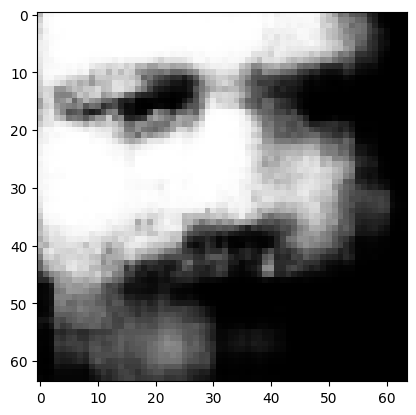

loss(generator):  1276.6785998535156


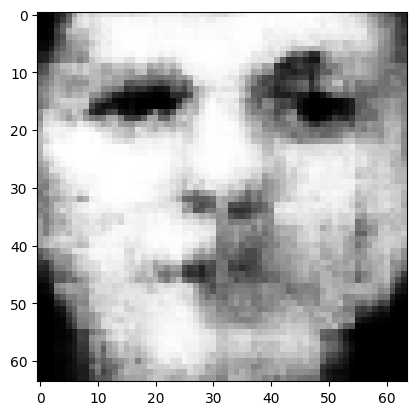

test loss:  1257.5136022949218
loss(generator):  1239.2749914550782
loss(generator):  1233.5728842163087
loss(generator):  1233.7794085693358
loss(generator):  1230.710979614258
loss(generator):  1230.4712222290038
loss(generator):  1254.986946105957
loss(generator):  1292.3333364868165
loss(generator):  1272.435714111328
loss(generator):  1240.2020358276368
loss(generator):  1223.359613647461


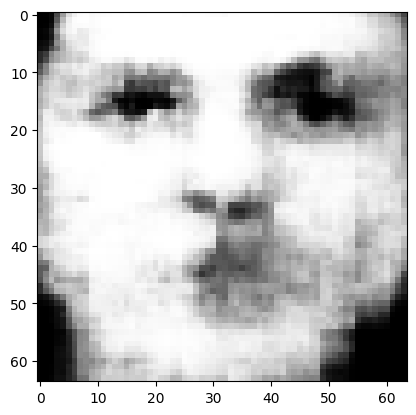

test loss:  1389.3250448608399
loss(generator):  1221.5154794311522
loss(generator):  1204.5041876220703
loss(generator):  1193.7005529785156
loss(generator):  1199.756046295166
loss(generator):  1220.4688650512696
loss(generator):  1197.6117953491212
loss(generator):  1177.1926232910157
loss(generator):  1169.0008082580566
loss(generator):  1159.5238262939454


In [5]:
train_VAE(40, 0.00001, 0.00001, 1)

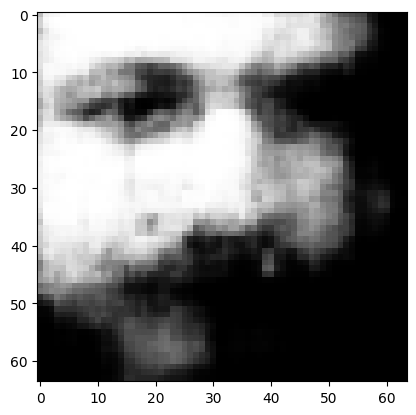

loss(generator):  1181.2351135253907


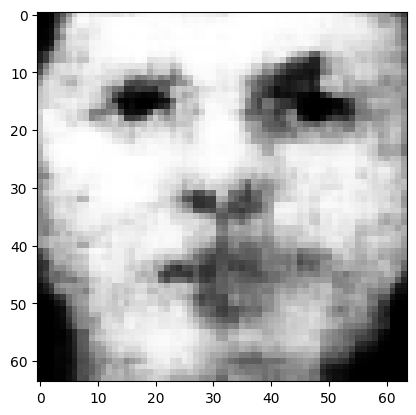

test loss:  1221.2675927734374
loss(generator):  1167.7623748779297
loss(generator):  1172.6338262939453
loss(generator):  1173.800929107666
loss(generator):  1174.6929055786134
loss(generator):  1182.5958685302735
loss(generator):  1190.274080505371
loss(generator):  1185.0156188964843
loss(generator):  1193.202435913086
loss(generator):  1199.4461749267577
loss(generator):  1188.6892074584962


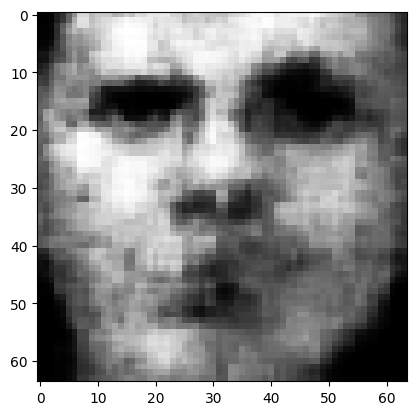

test loss:  1311.6986520385742
loss(generator):  1173.9235244750976
loss(generator):  1165.2912518310548
loss(generator):  1169.224210510254
loss(generator):  1157.956594543457
loss(generator):  1145.3945663452148
loss(generator):  1143.9418887329102
loss(generator):  1149.739437866211
loss(generator):  1153.7903216552734
loss(generator):  1163.7614956665038


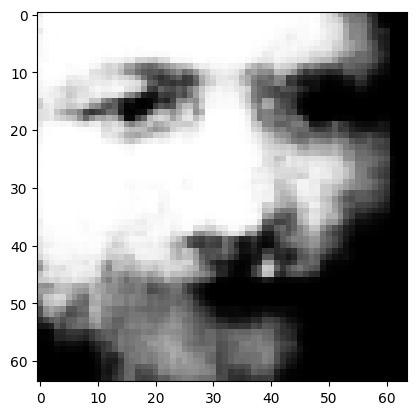

loss(generator):  1177.4718969726562


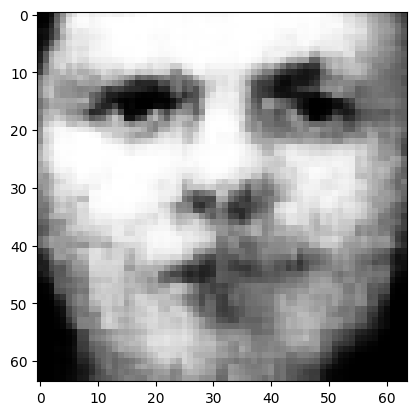

test loss:  1204.0850506591796
loss(generator):  1186.1197463989258
loss(generator):  1214.486137084961
loss(generator):  1208.514252319336
loss(generator):  1190.5214978027343
loss(generator):  1188.0161712646484
loss(generator):  1184.7549533081055
loss(generator):  1175.5943154907227
loss(generator):  1150.3485397338868
loss(generator):  1147.9041900634766
loss(generator):  1144.2939038085938


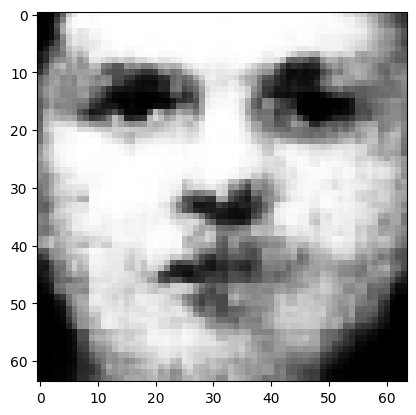

test loss:  1157.4466613769532
loss(generator):  1140.3024746704102
loss(generator):  1127.9102780151368
loss(generator):  1117.243059234619
loss(generator):  1110.8892445373535
loss(generator):  1106.6689389038086
loss(generator):  1101.5469213867189
loss(generator):  1087.0164944458008
loss(generator):  1076.266626586914
loss(generator):  1068.4404023742675


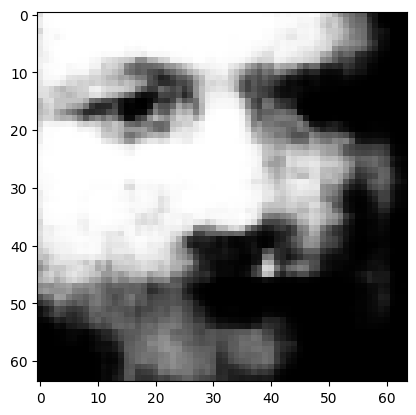

loss(generator):  1070.887282409668


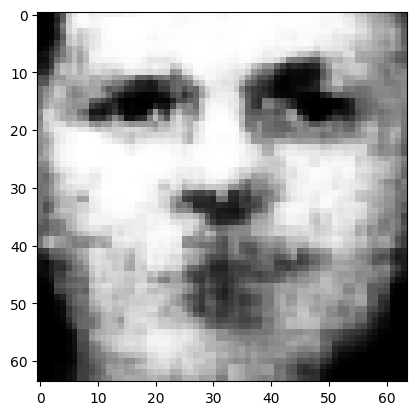

test loss:  1068.7558354187013
loss(generator):  1067.1166076660156
loss(generator):  1071.6366728210448
loss(generator):  1072.7118548583985
loss(generator):  1066.3974377441407
loss(generator):  1063.2851956176758
loss(generator):  1057.882894744873
loss(generator):  1053.406728515625
loss(generator):  1049.678642578125
loss(generator):  1048.7549269104004
loss(generator):  1055.8719120788573


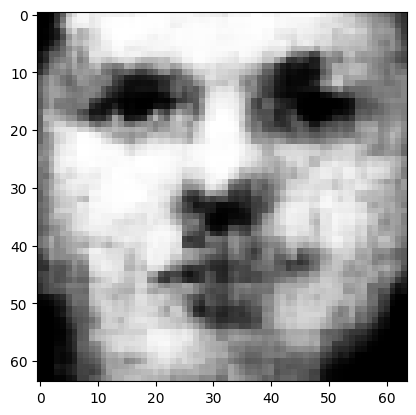

test loss:  1102.1461157226563
loss(generator):  1050.8272427368165
loss(generator):  1045.97843460083
loss(generator):  1042.0468646240233
loss(generator):  1038.4981790161132
loss(generator):  1036.2054260253906
loss(generator):  1034.5027416992189
loss(generator):  1038.5462393188477
loss(generator):  1035.084079437256
loss(generator):  1036.3645471191405


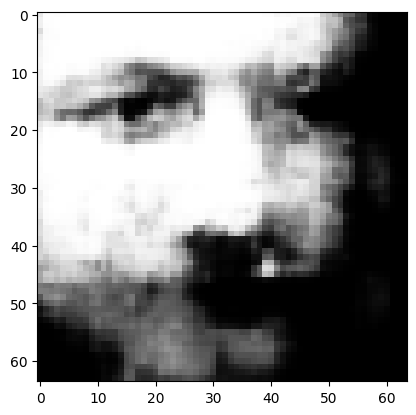

loss(generator):  1034.4230769348144


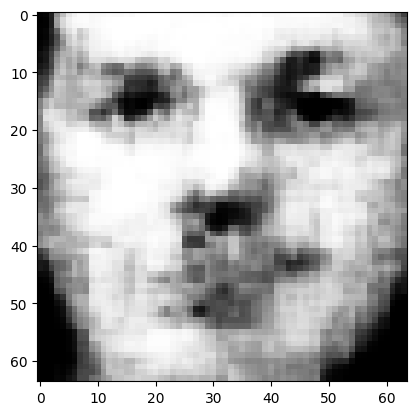

test loss:  1087.4675289916993
loss(generator):  1026.166781463623
loss(generator):  1023.7721765136719
loss(generator):  1024.598345336914
loss(generator):  1030.6155099487305
loss(generator):  1029.5355993652345
loss(generator):  1028.8302395629883
loss(generator):  1026.2074876403808
loss(generator):  1025.82560546875
loss(generator):  1028.909967956543
loss(generator):  1027.3349229431153


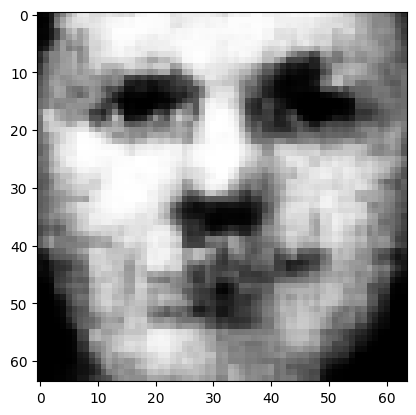

test loss:  1051.5418045043946
loss(generator):  1027.0172979736328
loss(generator):  1022.8705894470215
loss(generator):  1022.6864245605469
loss(generator):  1019.1061833190918
loss(generator):  1021.6319982910156
loss(generator):  1019.7498371887207
loss(generator):  1011.448055267334
loss(generator):  1014.3996711730957
loss(generator):  1010.1359971618652


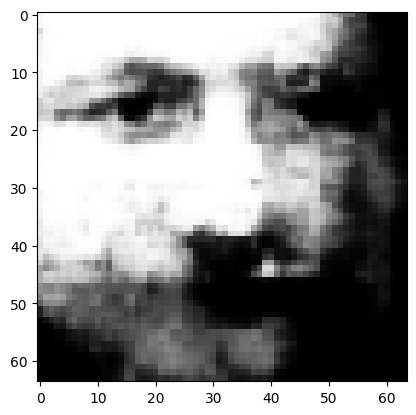

loss(generator):  1006.8890560913086


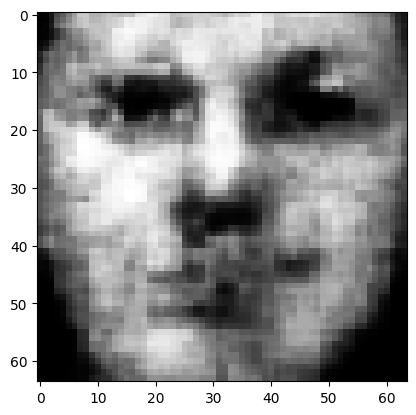

test loss:  1046.3176298522949
loss(generator):  1011.1210487365722
loss(generator):  1012.9799870300293
loss(generator):  1020.4014140319824
loss(generator):  1019.4675540161132
loss(generator):  1021.7117250061035
loss(generator):  1024.1873956298828
loss(generator):  1025.8228897094727
loss(generator):  1033.1701544189452
loss(generator):  1037.0535035705566
loss(generator):  1042.3816159057617


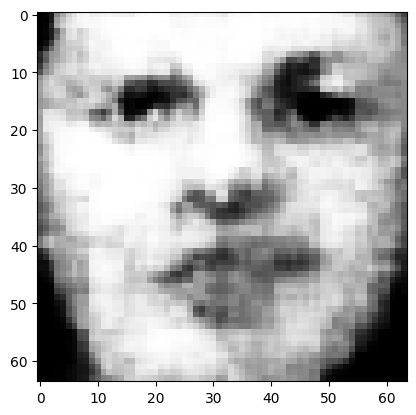

test loss:  1362.941148071289
loss(generator):  1049.9971069335938
loss(generator):  1046.699669189453
loss(generator):  1051.4539312744141
loss(generator):  1054.3433210754395
loss(generator):  1059.096806640625
loss(generator):  1056.5683071899414
loss(generator):  1050.473854675293
loss(generator):  1044.9299493408203
loss(generator):  1031.786466217041


In [6]:
train_VAE(100, 0.00001, 0.00001, 0.995)

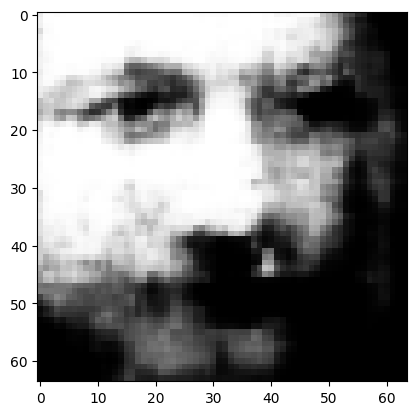

loss(generator):  1016.6751879882812


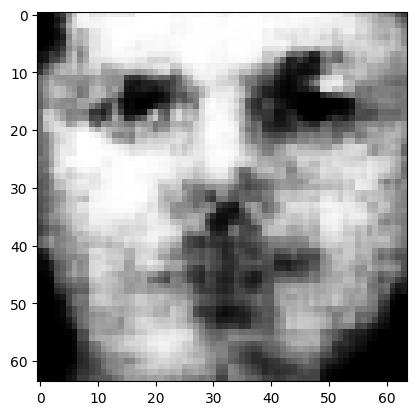

test loss:  1049.5459722900391
loss(generator):  1011.3634048461914
loss(generator):  1005.9933937072753
loss(generator):  1004.2951110839844
loss(generator):  1003.1310990905762
loss(generator):  1000.7976106262207
loss(generator):  999.3278460693359
loss(generator):  994.8606317138672
loss(generator):  992.1920283508301
loss(generator):  990.3985693359375
loss(generator):  991.5356617736817


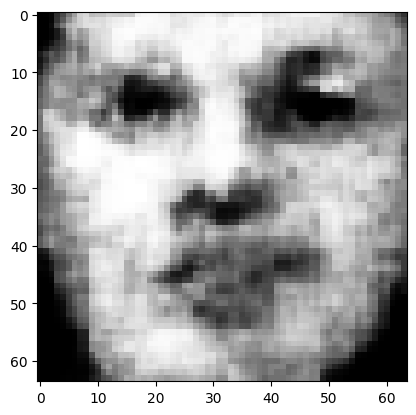

test loss:  1052.7639707946778
loss(generator):  989.2740026855469
loss(generator):  990.3207211303711
loss(generator):  989.5677127075195
loss(generator):  994.6987762451172
loss(generator):  993.6530876159668
loss(generator):  992.9442820739746
loss(generator):  992.185419921875
loss(generator):  991.5264213562011
loss(generator):  991.6180288696289


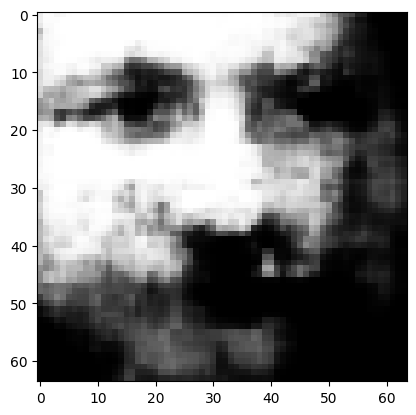

loss(generator):  988.9313537597657


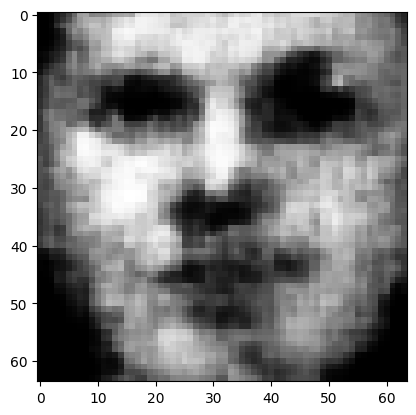

test loss:  1168.4198025512696
loss(generator):  987.0434538269043
loss(generator):  986.8772895812988
loss(generator):  987.068362121582
loss(generator):  984.174633026123
loss(generator):  982.3837173461914
loss(generator):  981.1915167236328
loss(generator):  976.2453440856933
loss(generator):  974.7172564697265
loss(generator):  972.8302113342285
loss(generator):  973.8310501098633


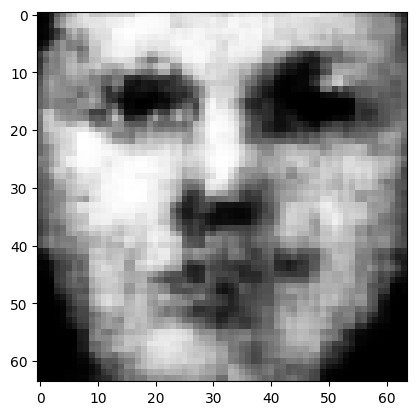

test loss:  1005.7434782409669
loss(generator):  971.2052116394043
loss(generator):  972.8829716491699
loss(generator):  972.2697328186035
loss(generator):  975.976909942627
loss(generator):  975.5332572937011
loss(generator):  977.5311642456055
loss(generator):  981.295867767334
loss(generator):  978.4952848815918
loss(generator):  977.8095840454101


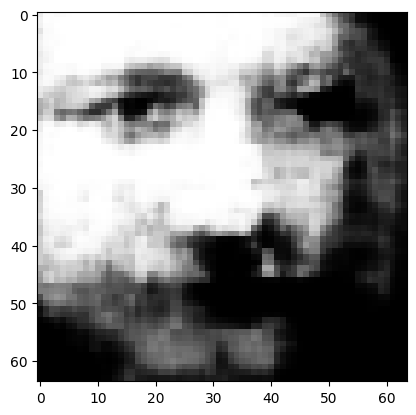

loss(generator):  974.5448046875


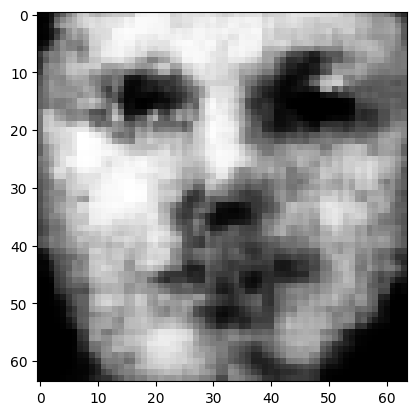

test loss:  1019.519012145996
loss(generator):  972.187603149414
loss(generator):  970.9465924072266
loss(generator):  974.0207154846191
loss(generator):  972.150705871582
loss(generator):  970.595475769043
loss(generator):  967.6212986755371
loss(generator):  964.7258242797851
loss(generator):  960.6998704528809
loss(generator):  957.5057781982422
loss(generator):  955.337643737793


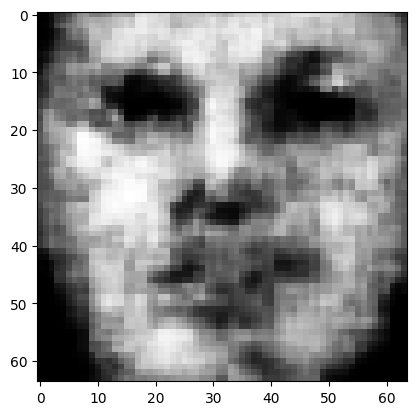

test loss:  977.2779452514649
loss(generator):  953.7146374511718
loss(generator):  953.4103665161133
loss(generator):  950.6165173339843
loss(generator):  949.2176647949219
loss(generator):  949.0375907897949
loss(generator):  949.0320585632325
loss(generator):  948.4379226684571
loss(generator):  948.2159973144531
loss(generator):  946.7787754821777


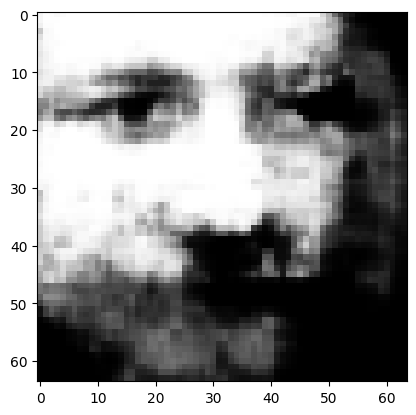

loss(generator):  946.9757553100586


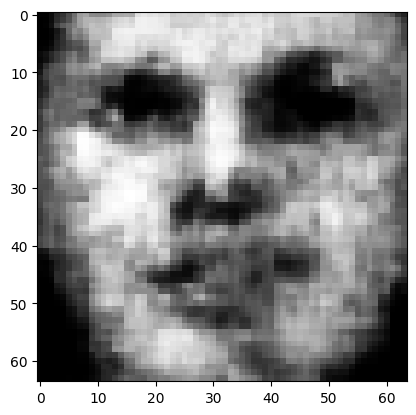

test loss:  998.3529206848144
loss(generator):  944.851847076416
loss(generator):  944.2860076904296
loss(generator):  944.2289637756347
loss(generator):  943.7463822937011
loss(generator):  943.4287640380859
loss(generator):  943.1052445983887
loss(generator):  943.6749365234375
loss(generator):  942.9684983825683
loss(generator):  943.3949787902832
loss(generator):  943.4470173645019


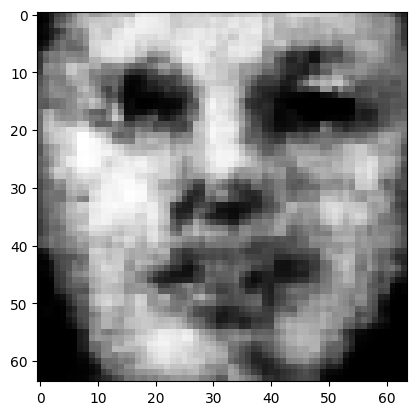

test loss:  968.9113011169434
loss(generator):  941.5548275756836
loss(generator):  940.359264831543
loss(generator):  938.7792626953125
loss(generator):  938.8344288635254
loss(generator):  936.5734347534179
loss(generator):  933.2093589782714
loss(generator):  931.0530628967285
loss(generator):  930.4517506408691
loss(generator):  928.2722225952149


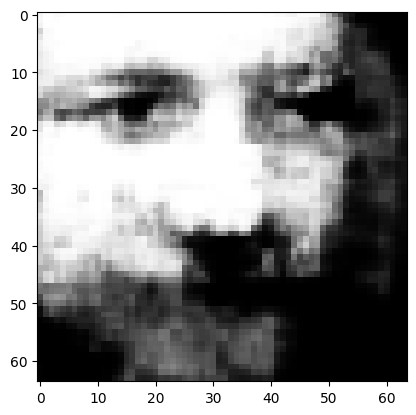

loss(generator):  927.8688287353516


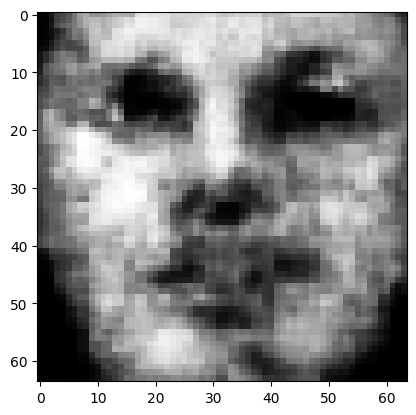

test loss:  978.7574696350098
loss(generator):  927.0625570678711
loss(generator):  926.0496463012695
loss(generator):  925.7595188903808
loss(generator):  924.3539778137207
loss(generator):  923.7257276916504
loss(generator):  921.9983140563965
loss(generator):  921.9966238403321
loss(generator):  921.0571852111816
loss(generator):  920.3405155944824
loss(generator):  918.1926663208008


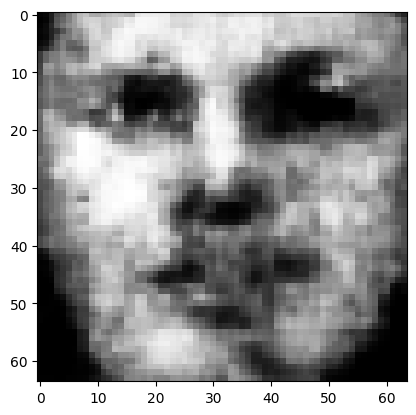

test loss:  948.1438948059082
loss(generator):  918.2686730957031
loss(generator):  916.9785171508789
loss(generator):  916.5745027160644
loss(generator):  915.154393005371
loss(generator):  914.7846885681153
loss(generator):  913.6880546569824
loss(generator):  912.8695703125
loss(generator):  912.3815295410157
loss(generator):  911.2085220336915


In [7]:
train_VAE(100, 0.0000066, 0.00001, 0.995)

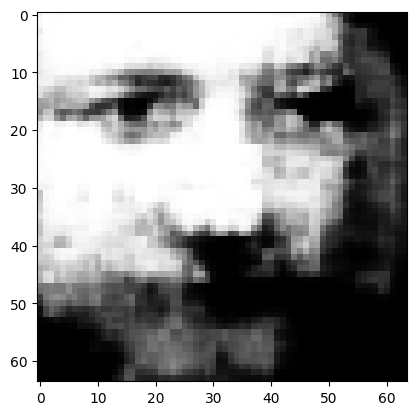

loss(generator):  910.6652130126953


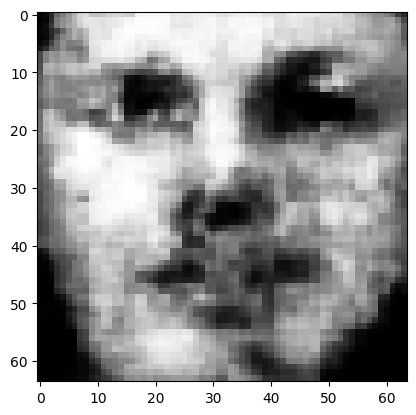

test loss:  929.970396270752
loss(generator):  910.4295021057129
loss(generator):  911.5355180358887
loss(generator):  910.44013671875
loss(generator):  909.7401983642578
loss(generator):  908.4553503417969
loss(generator):  907.8336940002441
loss(generator):  906.676128540039
loss(generator):  906.157177734375
loss(generator):  906.080181427002
loss(generator):  906.1777326965332


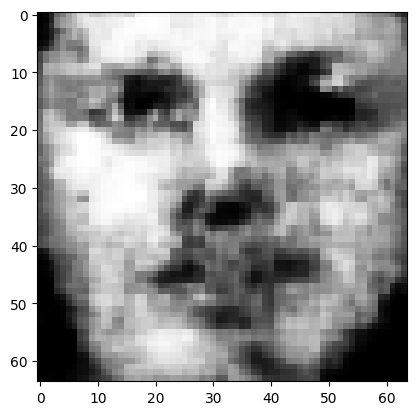

test loss:  929.1474600219726
loss(generator):  904.793911743164
loss(generator):  904.2215884399415
loss(generator):  904.4521301269531
loss(generator):  903.1468540954589
loss(generator):  903.5330075073242
loss(generator):  903.1806004333496
loss(generator):  902.3356224060059
loss(generator):  901.2023565673828
loss(generator):  900.8461462402344


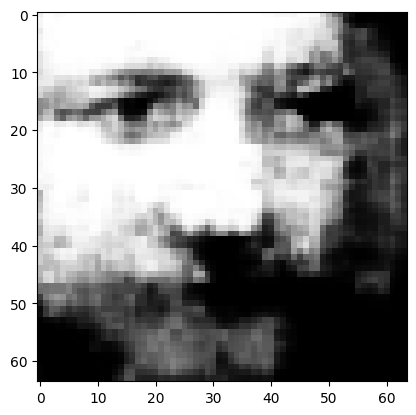

loss(generator):  899.827208404541


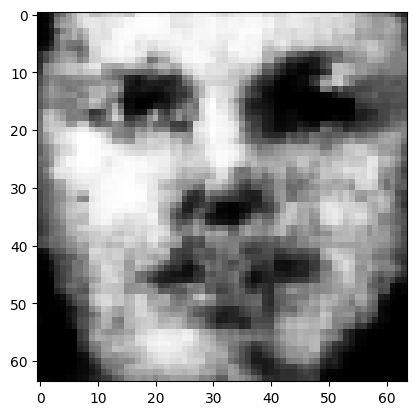

test loss:  921.7462193298339
loss(generator):  899.2780529785156
loss(generator):  898.7902717590332
loss(generator):  898.6760636901855
loss(generator):  897.4073825073242
loss(generator):  897.6199285888672
loss(generator):  897.3283988952637
loss(generator):  896.2941223144531
loss(generator):  896.1090859985352
loss(generator):  895.6357527160644
loss(generator):  895.0358145141602


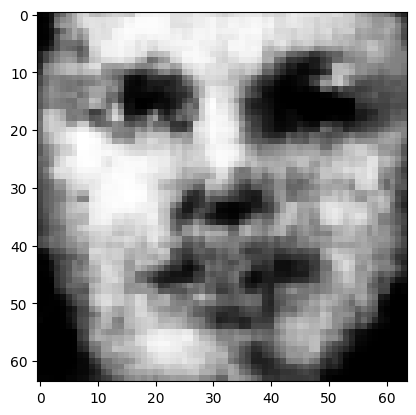

test loss:  916.1219073486328
loss(generator):  894.5149578857422
loss(generator):  894.0071842956543
loss(generator):  893.6616920471191
loss(generator):  893.6974433898926
loss(generator):  892.5505186462402
loss(generator):  892.4541502380371
loss(generator):  892.009488067627
loss(generator):  892.000414276123
loss(generator):  890.7394110107422


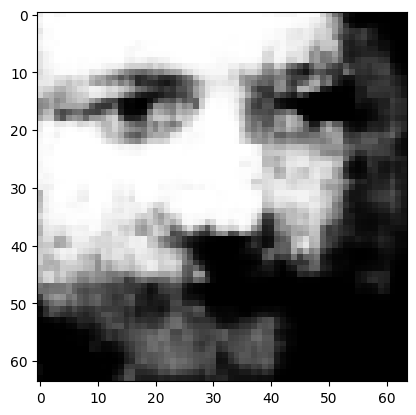

loss(generator):  890.8468670654297


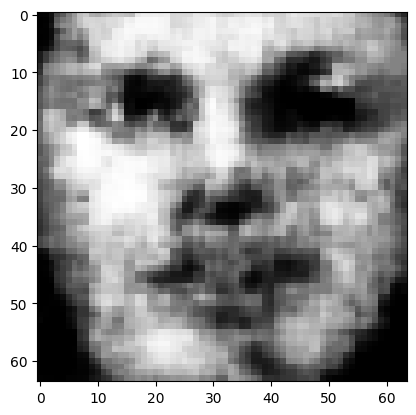

test loss:  901.8161918640137
loss(generator):  890.3471084594727
loss(generator):  890.0770907592773
loss(generator):  888.8465437316895
loss(generator):  888.133424987793
loss(generator):  888.054412536621
loss(generator):  887.6158876037598
loss(generator):  887.4926818847656
loss(generator):  886.5171740722657
loss(generator):  886.5812759399414
loss(generator):  886.1966725158692


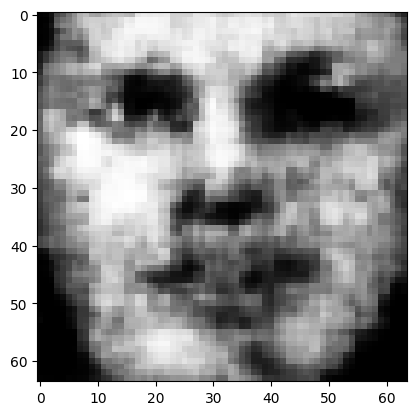

test loss:  895.6068605041504
loss(generator):  886.053522491455
loss(generator):  885.3410110473633
loss(generator):  884.744315032959
loss(generator):  884.3167646789551
loss(generator):  883.702868347168
loss(generator):  884.1336596679688
loss(generator):  882.9961958312988
loss(generator):  882.4621357727051
loss(generator):  882.2537908935547


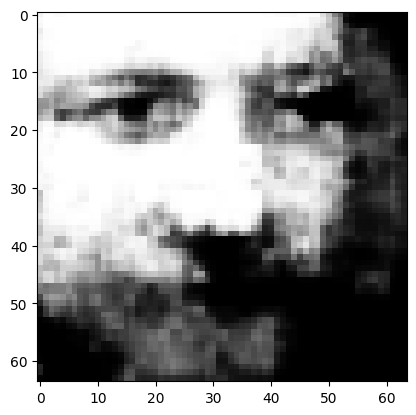

loss(generator):  881.8248310852051


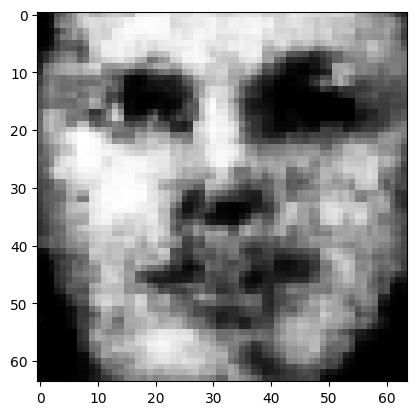

test loss:  891.2553875732422
loss(generator):  881.2029574584961
loss(generator):  881.0502294921876
loss(generator):  880.8879484558106
loss(generator):  880.9325746154785
loss(generator):  880.5840516662597
loss(generator):  879.5082388305664
loss(generator):  879.442405090332
loss(generator):  878.9669110107421
loss(generator):  878.6472119140625
loss(generator):  878.5973612976074


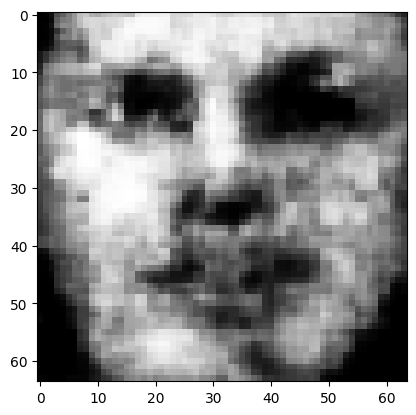

test loss:  886.5840379333496
loss(generator):  878.3879902648926
loss(generator):  878.3468403625488
loss(generator):  877.9133186340332
loss(generator):  877.2256867980957
loss(generator):  877.1101037597656
loss(generator):  876.4860832214356
loss(generator):  876.226735534668
loss(generator):  876.2062817382813
loss(generator):  876.2985751342774


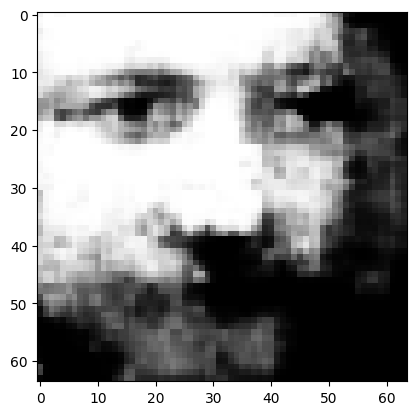

loss(generator):  875.8075929260253


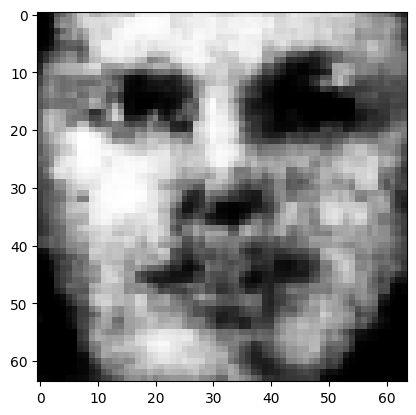

test loss:  883.460520477295
loss(generator):  875.3324029541016
loss(generator):  875.0721789550781
loss(generator):  874.7579153442383
loss(generator):  874.3559298706055
loss(generator):  874.165007019043
loss(generator):  873.8923919677734
loss(generator):  873.4811999511719
loss(generator):  873.022777557373
loss(generator):  872.8302041625976
loss(generator):  872.4859642028808


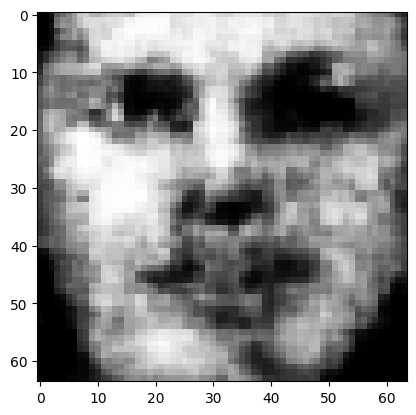

test loss:  879.8217945861817
loss(generator):  872.5472050476075
loss(generator):  872.3125772094727
loss(generator):  872.1983624267579
loss(generator):  871.9046705627442
loss(generator):  871.5992407226563
loss(generator):  871.3631362915039
loss(generator):  871.0872142028809
loss(generator):  870.7834187316895
loss(generator):  870.7113481140136


In [8]:
train_VAE(100, 0.0000044, 0.00001, 0.995)

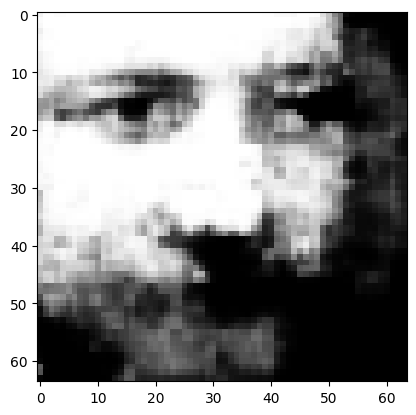

loss(generator):  871.6863227844239


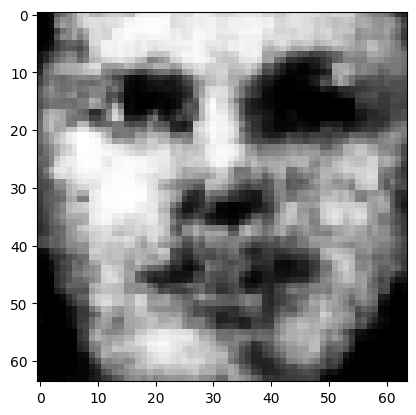

test loss:  878.8987831115722
loss(generator):  872.2441329956055
loss(generator):  871.9951881408691
loss(generator):  872.2661743164062
loss(generator):  871.8158242797851
loss(generator):  871.0367823791504
loss(generator):  870.9184523010254
loss(generator):  870.2681533813477
loss(generator):  870.0800335693359
loss(generator):  869.6302732849122
loss(generator):  869.6406423950195


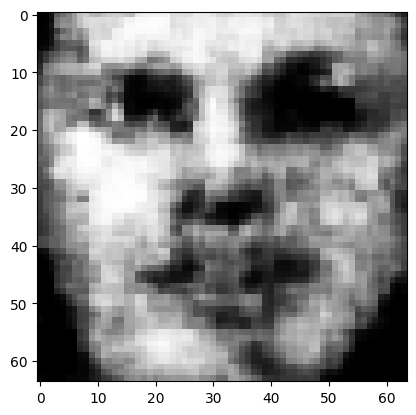

test loss:  877.2858560180664
loss(generator):  869.6715507507324
loss(generator):  869.2368910217285
loss(generator):  869.2644657897949
loss(generator):  868.6844326782226
loss(generator):  868.0675077819824
loss(generator):  867.723324432373
loss(generator):  867.7029495239258
loss(generator):  867.7714682006836
loss(generator):  867.5771400451661


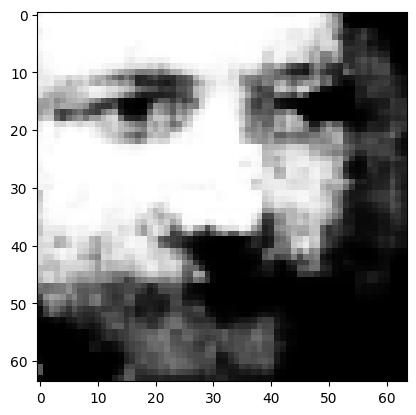

loss(generator):  867.3388693237305


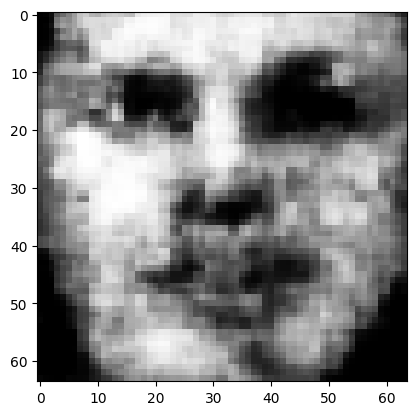

test loss:  873.7940287780762
loss(generator):  867.2270945739746
loss(generator):  867.3194650268555
loss(generator):  866.729317779541
loss(generator):  866.603692779541
loss(generator):  866.1799964904785
loss(generator):  865.6815800476074
loss(generator):  865.3939308166504
loss(generator):  865.4196823120117
loss(generator):  865.2563174438477
loss(generator):  864.9089381408692


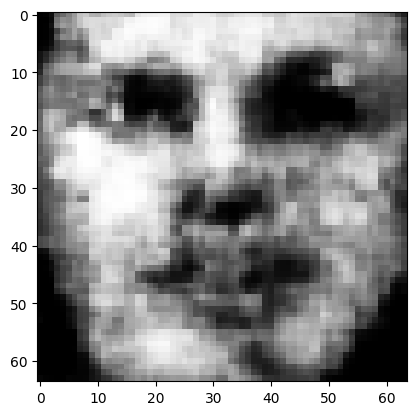

test loss:  871.936763305664
loss(generator):  864.6583963012695
loss(generator):  864.2960862731934
loss(generator):  864.441334991455
loss(generator):  864.1856356811523
loss(generator):  864.2140379333496
loss(generator):  863.9266842651367
loss(generator):  863.6219439697265
loss(generator):  863.4029055786133
loss(generator):  862.9915090942383


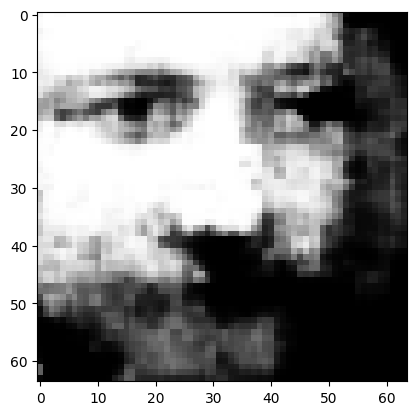

loss(generator):  862.6473564147949


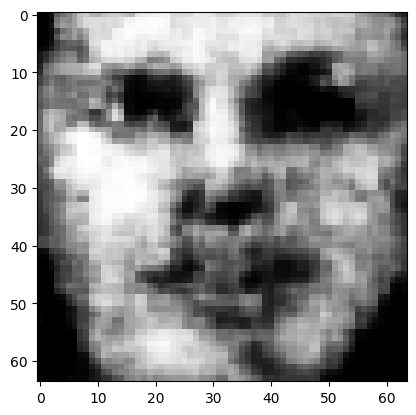

test loss:  869.1302742004394
loss(generator):  862.4015104675293
loss(generator):  862.4513053894043
loss(generator):  862.1681427001953
loss(generator):  862.216634979248
loss(generator):  861.9726931762696
loss(generator):  862.1331530761719
loss(generator):  861.8805128479004
loss(generator):  861.3816319274903
loss(generator):  861.1953382873535
loss(generator):  860.8059788513184


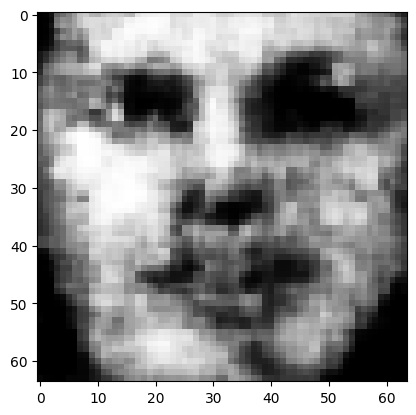

test loss:  867.3120935058594
loss(generator):  860.6793446350098
loss(generator):  860.7334144592285
loss(generator):  860.3458987426758
loss(generator):  860.0777575683594
loss(generator):  859.8699890136719
loss(generator):  859.7377137756348
loss(generator):  859.4828294372559
loss(generator):  859.3516046142578
loss(generator):  859.5061311340332


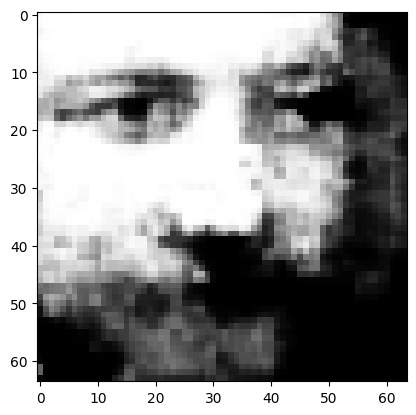

loss(generator):  859.4887382507325


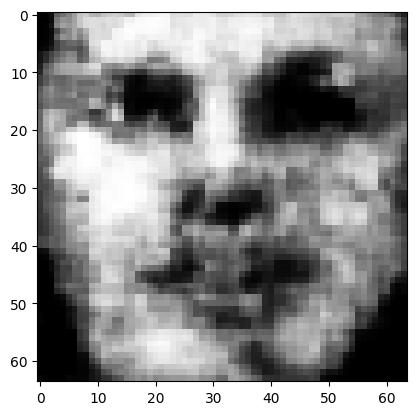

test loss:  865.5982194519042
loss(generator):  859.31113571167
loss(generator):  858.9530020141601
loss(generator):  858.834419708252
loss(generator):  858.7010885620117
loss(generator):  858.5131077575684
loss(generator):  858.2335252380371
loss(generator):  858.2338063049316
loss(generator):  857.9559176635743
loss(generator):  857.8210893249511
loss(generator):  857.6164479064942


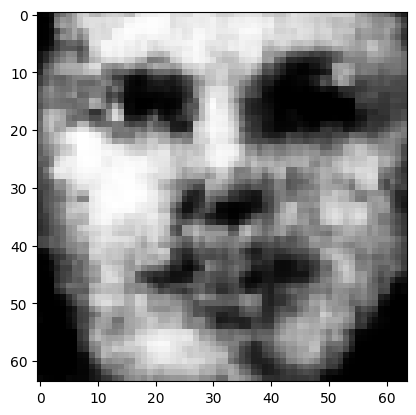

test loss:  863.4748664855957
loss(generator):  857.4246482849121
loss(generator):  857.3185687255859
loss(generator):  857.3256575012207
loss(generator):  857.1057608032227
loss(generator):  856.7021838378906
loss(generator):  856.5479197692871
loss(generator):  856.4912733459473
loss(generator):  856.3857647705078
loss(generator):  856.1885038757324


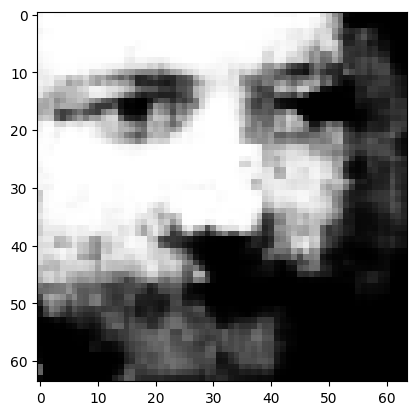

loss(generator):  856.0308343505859


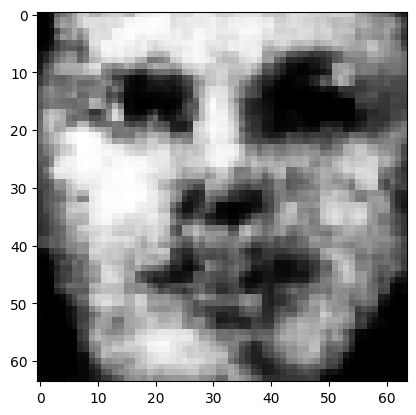

test loss:  861.736545715332
loss(generator):  855.9995989990234
loss(generator):  855.8119197082519
loss(generator):  855.6098680114746
loss(generator):  855.4107713317871
loss(generator):  855.3355230712891
loss(generator):  855.2434155273437
loss(generator):  855.2995483398438
loss(generator):  855.1117948913575
loss(generator):  854.9773973083496
loss(generator):  854.9657458496093


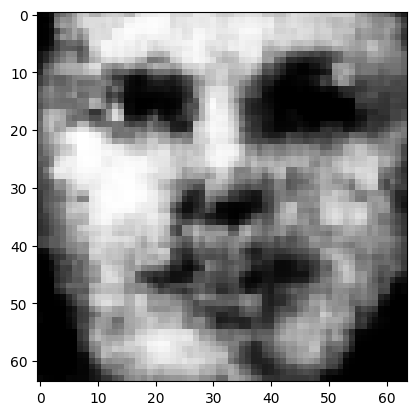

test loss:  860.3274543762207
loss(generator):  854.6058647155762
loss(generator):  854.509909210205
loss(generator):  854.2995216369629
loss(generator):  854.1278855895996
loss(generator):  854.0313166809082
loss(generator):  854.1438491821289
loss(generator):  853.9424618530273
loss(generator):  853.8320712280273
loss(generator):  853.7197862243652


In [9]:
train_VAE(100, 0.000003, 0.00001, 0.995)

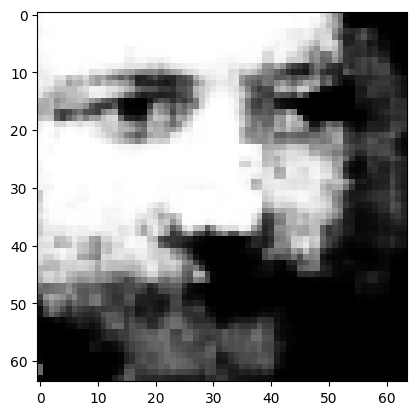

loss(generator):  853.9618751525879


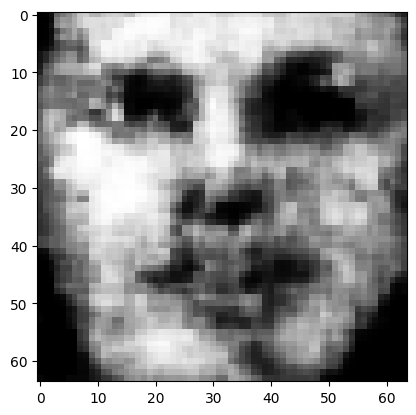

test loss:  859.4995011901856
loss(generator):  853.820936126709
loss(generator):  853.802645111084
loss(generator):  853.8789445495605
loss(generator):  853.9551799011231
loss(generator):  853.7296409606934
loss(generator):  853.4806442260742
loss(generator):  853.2206436157227
loss(generator):  853.1125009155273
loss(generator):  853.0033010864258
loss(generator):  852.7854121398926


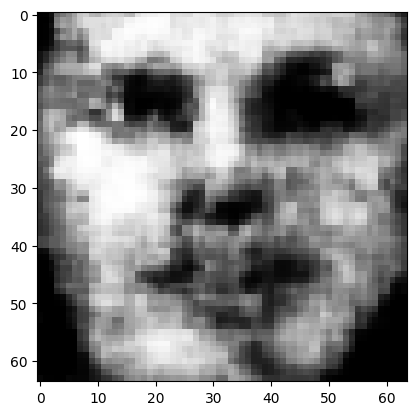

test loss:  858.094916229248
loss(generator):  852.636402130127
loss(generator):  852.5779826354981
loss(generator):  852.488158569336
loss(generator):  852.3945986938477
loss(generator):  852.3164215087891
loss(generator):  852.2064105224609
loss(generator):  852.1936785888672
loss(generator):  851.9298757934571
loss(generator):  851.8639358520508


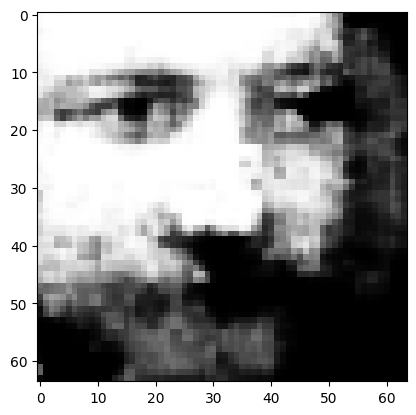

loss(generator):  851.7390695190429


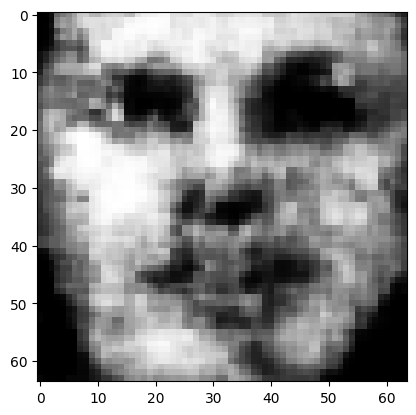

test loss:  857.1683450317382
loss(generator):  851.5278256225586
loss(generator):  851.3329489135742
loss(generator):  851.1850598144531
loss(generator):  851.1807905578613
loss(generator):  851.1254962158204
loss(generator):  850.9164372253418
loss(generator):  850.7946589660645
loss(generator):  850.5526254272461
loss(generator):  850.6118026733399
loss(generator):  850.3603547668457


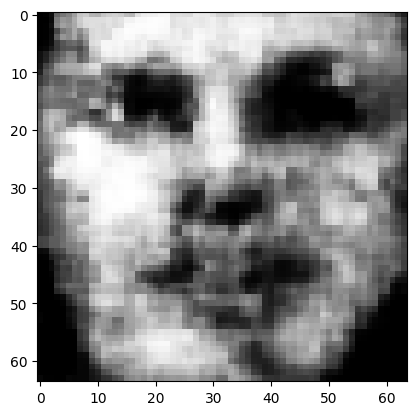

test loss:  855.9042839050293
loss(generator):  850.2654083251953
loss(generator):  850.0675823974609
loss(generator):  850.1091561889648
loss(generator):  850.0255166625976
loss(generator):  849.93921875
loss(generator):  849.7736148071289
loss(generator):  849.7232101440429
loss(generator):  849.5329505920411
loss(generator):  849.3373402404785


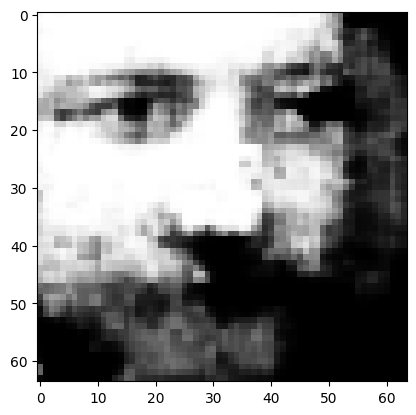

loss(generator):  849.2671192932129


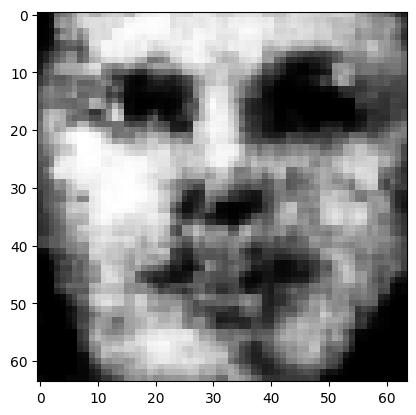

test loss:  854.3967098999024
loss(generator):  849.1492489624023
loss(generator):  849.0205307006836
loss(generator):  848.9868177795411
loss(generator):  848.8418624877929
loss(generator):  848.8274356079102
loss(generator):  848.7724610900879
loss(generator):  848.6522393798828
loss(generator):  848.5215686035157
loss(generator):  848.4790762329102
loss(generator):  848.3299223327637


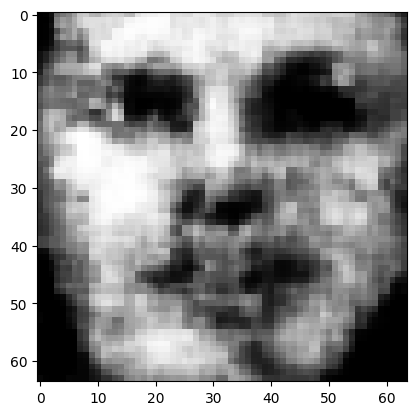

test loss:  853.4181831359863
loss(generator):  848.2363269042969
loss(generator):  848.1183996582031
loss(generator):  847.9589750671387
loss(generator):  847.9606898498536
loss(generator):  847.9851679992676
loss(generator):  847.8053076171875
loss(generator):  847.7471870422363
loss(generator):  847.5190734863281
loss(generator):  847.3842770385742


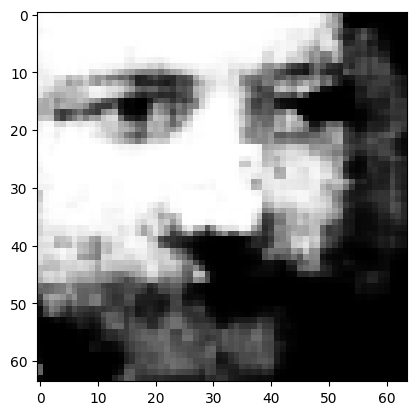

loss(generator):  847.2568075561524


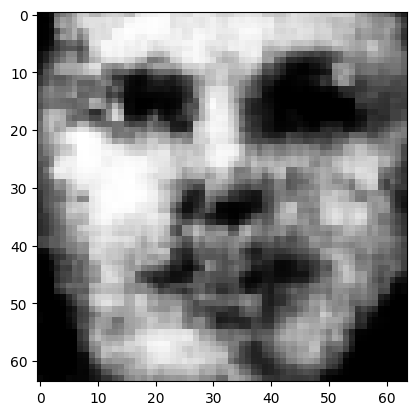

test loss:  851.9472241210938
loss(generator):  847.2131623840332
loss(generator):  847.1524681091308
loss(generator):  847.0650332641602
loss(generator):  846.9781823730468
loss(generator):  846.83970703125
loss(generator):  846.776951751709
loss(generator):  846.7343251037597
loss(generator):  846.6540895080566
loss(generator):  846.5716802978516
loss(generator):  846.4759063720703


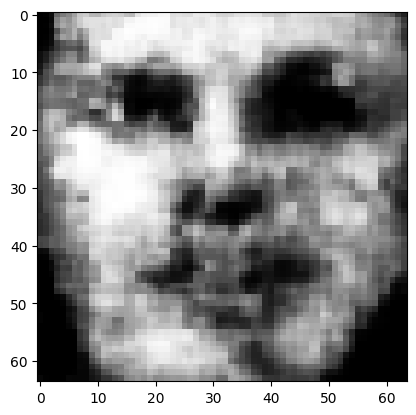

test loss:  850.9107577514649
loss(generator):  846.3172236633301
loss(generator):  846.2774214172364
loss(generator):  846.1105000305175
loss(generator):  846.0487258911132
loss(generator):  846.0241227722167
loss(generator):  845.9206178283691
loss(generator):  845.8038764953614
loss(generator):  845.7039863586426
loss(generator):  845.6344691467285


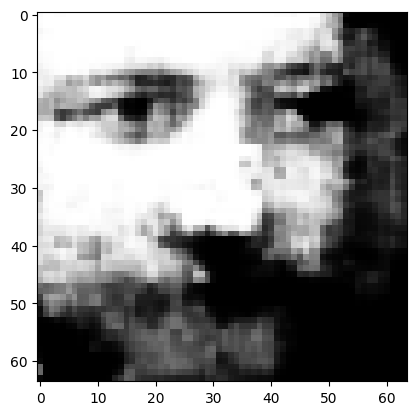

loss(generator):  845.5384066772461


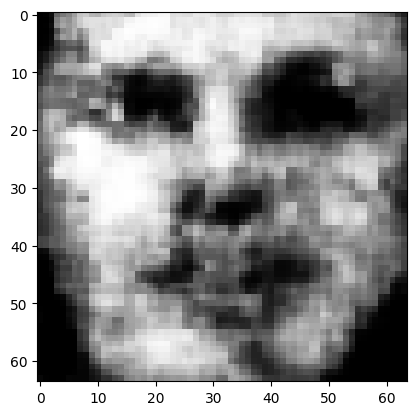

test loss:  850.0784831237793
loss(generator):  845.4735174560547
loss(generator):  845.3456846618652
loss(generator):  845.3165263366699
loss(generator):  845.3469438171387
loss(generator):  845.2330145263672
loss(generator):  845.0304997253418
loss(generator):  844.98302734375
loss(generator):  844.9637797546387
loss(generator):  844.8529106140137
loss(generator):  844.7232771301269


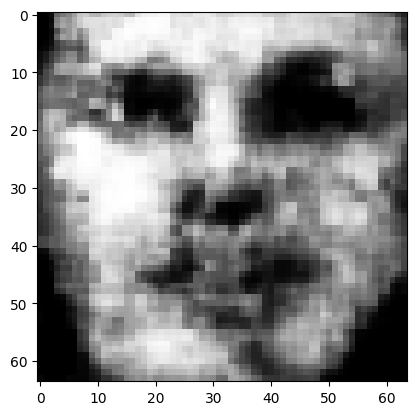

test loss:  848.792038116455
loss(generator):  844.6438751220703
loss(generator):  844.5355345153808
loss(generator):  844.4847253417969
loss(generator):  844.4348045349121
loss(generator):  844.344167175293
loss(generator):  844.3371394348145
loss(generator):  844.2332112121582
loss(generator):  844.1382020568848
loss(generator):  844.0795623779297


In [10]:
train_VAE(100, 0.000002, 0.00001, 0.995)

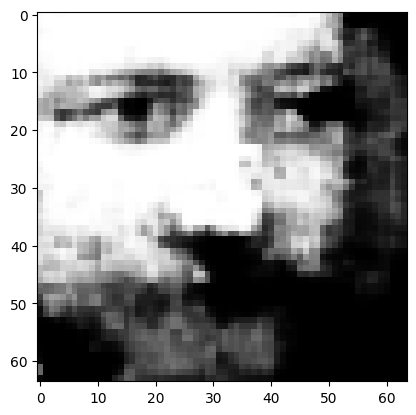

loss(generator):  843.4027206420899


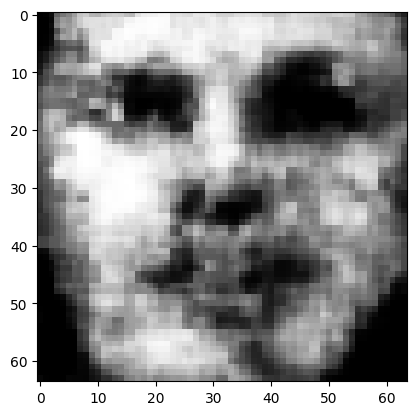

test loss:  846.356160736084
loss(generator):  843.1501405334473
loss(generator):  842.9932168579102
loss(generator):  842.9200163269043
loss(generator):  842.8405625915527
loss(generator):  842.7660591125489
loss(generator):  842.686967010498
loss(generator):  842.644801940918
loss(generator):  842.5573306274414
loss(generator):  842.5218922424316
loss(generator):  842.4390296936035


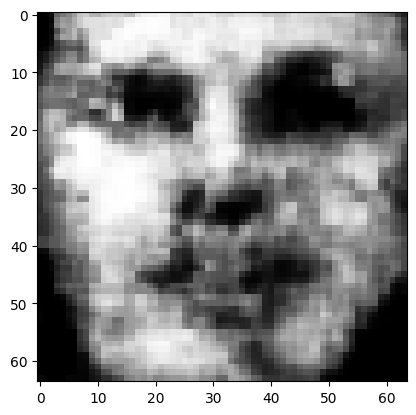

test loss:  845.0925395202637
loss(generator):  842.406558380127
loss(generator):  842.3512770080566
loss(generator):  842.2704054260254
loss(generator):  842.22076171875
loss(generator):  842.1632014465332
loss(generator):  842.1212271118164
loss(generator):  842.0728144836426
loss(generator):  841.9905168151855
loss(generator):  841.9523620605469


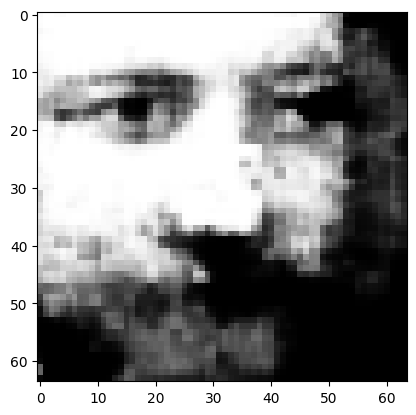

loss(generator):  841.8978157043457


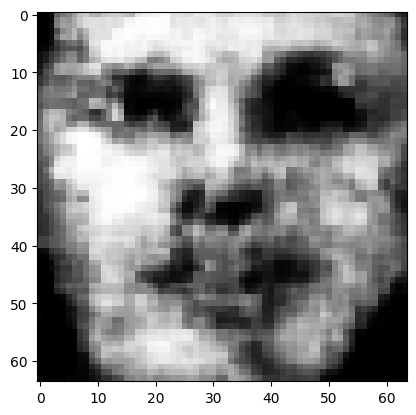

test loss:  844.3248300170899
loss(generator):  841.8528120422363
loss(generator):  841.7764448547364
loss(generator):  841.7392521667481
loss(generator):  841.7038088989258
loss(generator):  841.6557455444336
loss(generator):  841.6093138122559
loss(generator):  841.5247671508789
loss(generator):  841.4873287963867
loss(generator):  841.4449922180175
loss(generator):  841.4084713745117


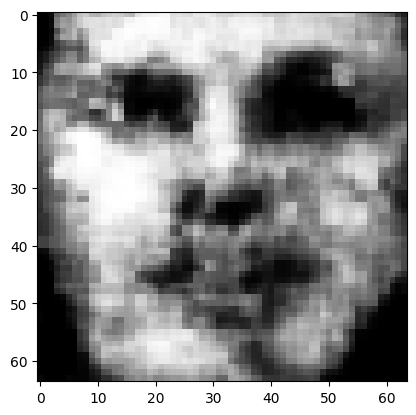

test loss:  843.5596321105957
loss(generator):  841.3360501098633
loss(generator):  841.3138778686523
loss(generator):  841.2365454101563
loss(generator):  841.1957060241699
loss(generator):  841.1399514770508
loss(generator):  841.1094338989258
loss(generator):  841.061185913086
loss(generator):  841.0344422912598
loss(generator):  840.9782376098633


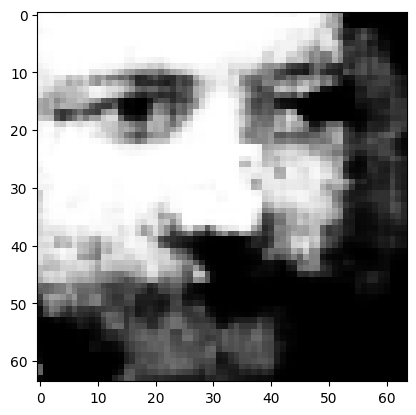

loss(generator):  840.9154373168946


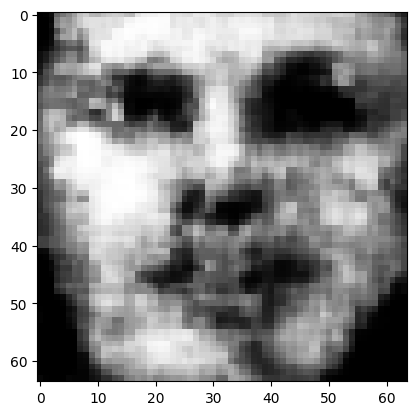

test loss:  842.9341897583008
loss(generator):  840.8947599792481
loss(generator):  840.8498477172851
loss(generator):  840.7856747436523
loss(generator):  840.7481755065918
loss(generator):  840.7123211669922
loss(generator):  840.686734008789
loss(generator):  840.6191033935547
loss(generator):  840.5721946716309
loss(generator):  840.5386000061035
loss(generator):  840.494614868164


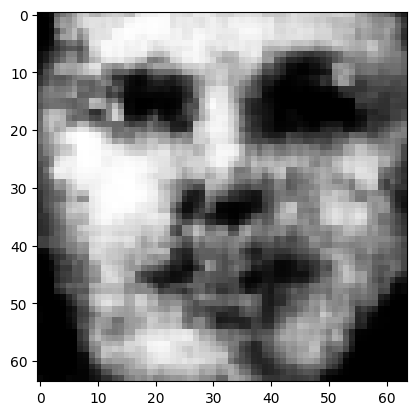

test loss:  842.3058421325684
loss(generator):  840.4573950195313
loss(generator):  840.4132072448731
loss(generator):  840.3767276000976
loss(generator):  840.3436701965333
loss(generator):  840.2946060180664
loss(generator):  840.2599340820312
loss(generator):  840.2151403808593
loss(generator):  840.1761079406738
loss(generator):  840.1315980529785


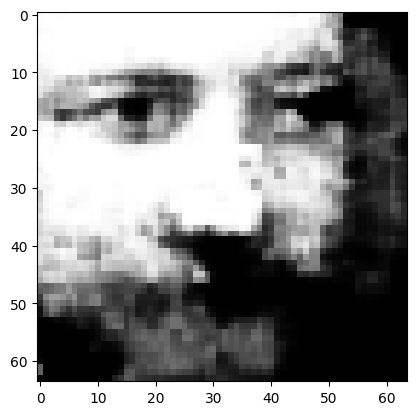

loss(generator):  840.0832995605468


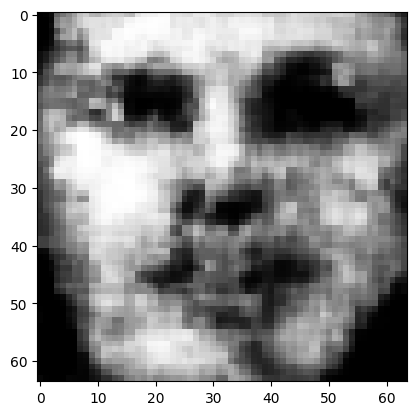

test loss:  841.6786427307129
loss(generator):  840.0614707946777
loss(generator):  839.9960949707031
loss(generator):  839.9778443908691
loss(generator):  839.9410475158692
loss(generator):  839.8971849060058
loss(generator):  839.8679760742187
loss(generator):  839.8310649108887
loss(generator):  839.7904089355469
loss(generator):  839.7510833740234
loss(generator):  839.719063873291


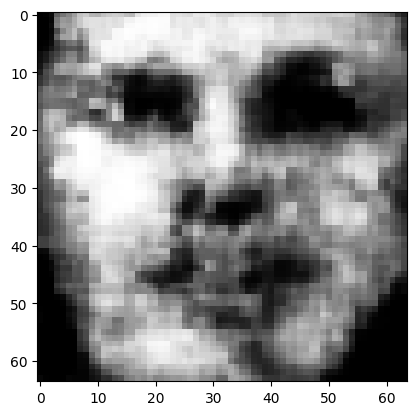

test loss:  841.1009858703613
loss(generator):  839.6612106323242
loss(generator):  839.6416232299805
loss(generator):  839.6078324890136
loss(generator):  839.5675004577637
loss(generator):  839.5316111755371
loss(generator):  839.5001893615722
loss(generator):  839.4594374084472
loss(generator):  839.4247877502441
loss(generator):  839.3728109741211


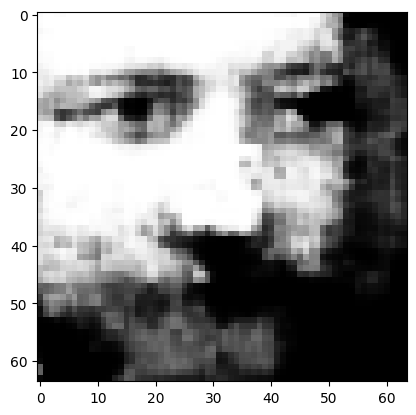

loss(generator):  839.3444369506836


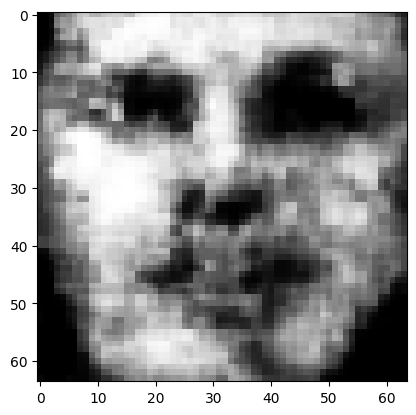

test loss:  840.5886367797851
loss(generator):  839.3120562744141
loss(generator):  839.2834559631348
loss(generator):  839.2318910217285
loss(generator):  839.2083694458008
loss(generator):  839.1819178771973
loss(generator):  839.1426718139649
loss(generator):  839.0931916809081
loss(generator):  839.072255859375
loss(generator):  839.0324696350098
loss(generator):  839.0196899414062


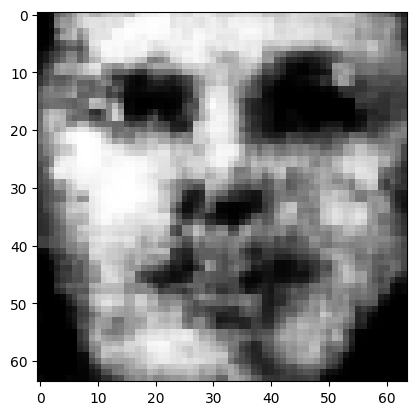

test loss:  840.0638412475586
loss(generator):  838.9651844787597
loss(generator):  838.9507173156738
loss(generator):  838.8851304626464
loss(generator):  838.8788269042968
loss(generator):  838.8272438049316
loss(generator):  838.8036601257324
loss(generator):  838.7652931213379
loss(generator):  838.7433599853516
loss(generator):  838.7012216186523


In [11]:
train_VAE(100, 0.0000008, 0.00001, 0.995)

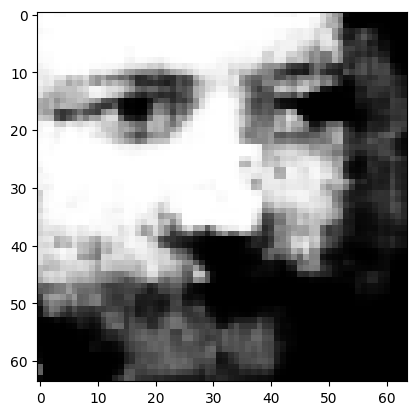

loss(generator):  838.6867456054688


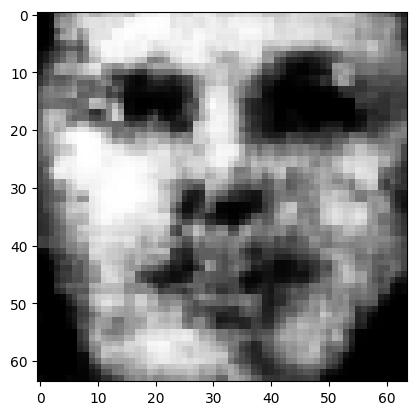

test loss:  839.6367835998535
loss(generator):  838.6649792480468
loss(generator):  838.6379650878906
loss(generator):  838.6050762939453
loss(generator):  838.5692517089843
loss(generator):  838.5476815795898
loss(generator):  838.5115151977539
loss(generator):  838.4891613769531
loss(generator):  838.4505012512207
loss(generator):  838.4172679138184
loss(generator):  838.3913825988769


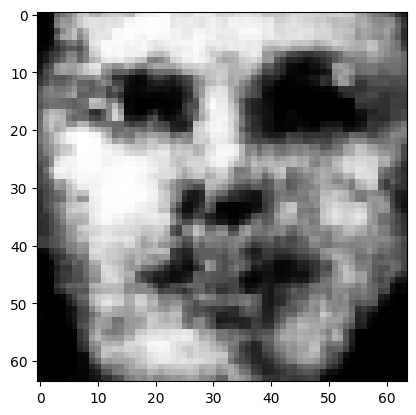

test loss:  839.1759358215332
loss(generator):  838.3509764099122
loss(generator):  838.3211570739746
loss(generator):  838.2994665527344
loss(generator):  838.2477505493164
loss(generator):  838.2407827758789
loss(generator):  838.2061123657227
loss(generator):  838.1800712585449
loss(generator):  838.1353228759766
loss(generator):  838.11210647583


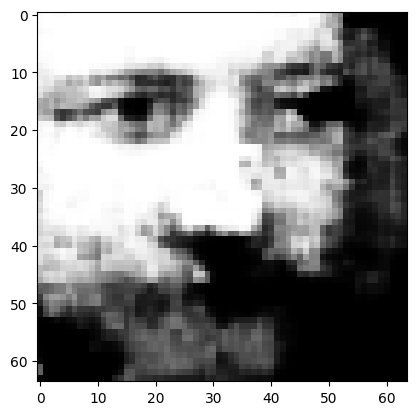

loss(generator):  838.0854811096192


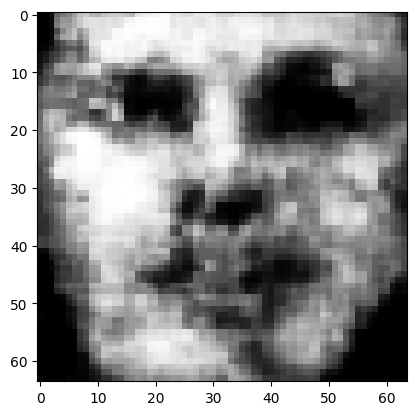

test loss:  838.7313722229004
loss(generator):  838.0481207275391
loss(generator):  838.0125958251953
loss(generator):  837.9894932556152
loss(generator):  837.957433166504
loss(generator):  837.9390756225586
loss(generator):  837.9127091979981
loss(generator):  837.8800897216797
loss(generator):  837.8483924865723
loss(generator):  837.8128057861328
loss(generator):  837.7847787475586


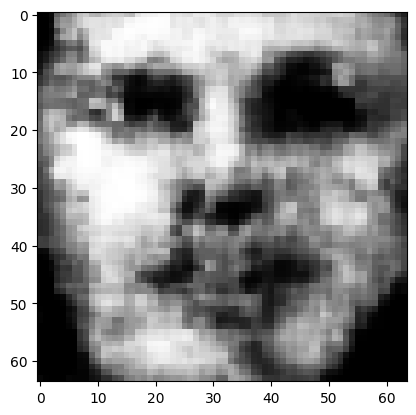

test loss:  838.2655017089844
loss(generator):  837.7572569274903
loss(generator):  837.735185546875
loss(generator):  837.6997579956055
loss(generator):  837.6738168334961
loss(generator):  837.6478349304199
loss(generator):  837.6213906860352
loss(generator):  837.5897035217286
loss(generator):  837.5707838439941
loss(generator):  837.5395440673828


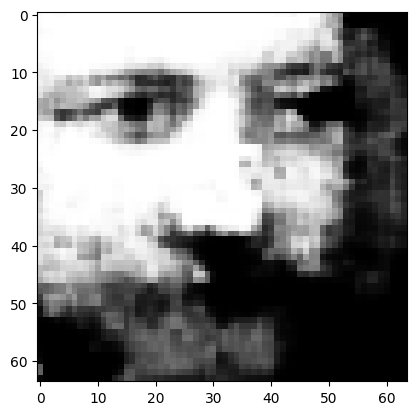

loss(generator):  837.5251690673828


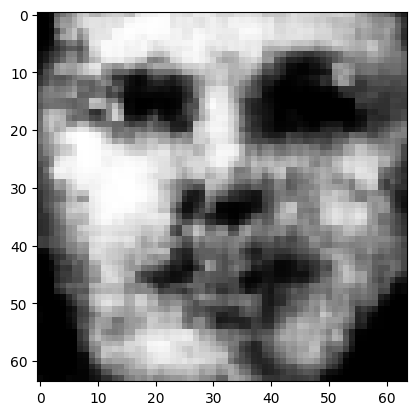

test loss:  837.8607440185547
loss(generator):  837.4916912841796
loss(generator):  837.4575030517578
loss(generator):  837.4336157226562
loss(generator):  837.4023641967774
loss(generator):  837.3789877319336
loss(generator):  837.3497882080078
loss(generator):  837.3202255249023
loss(generator):  837.2965460205078
loss(generator):  837.2790541076661
loss(generator):  837.2477122497559


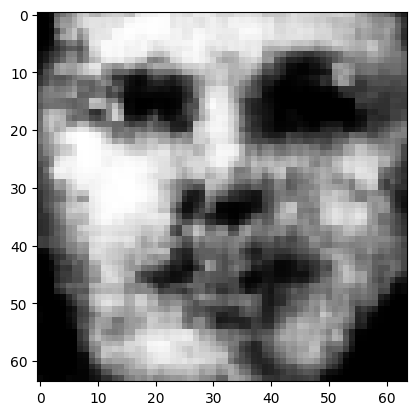

test loss:  837.4488528442383
loss(generator):  837.2168058776856
loss(generator):  837.1848272705079
loss(generator):  837.1627055358887
loss(generator):  837.1479440307617
loss(generator):  837.1233126831055
loss(generator):  837.0888725280762
loss(generator):  837.0597143554687
loss(generator):  837.0382192993164
loss(generator):  837.0154866027832


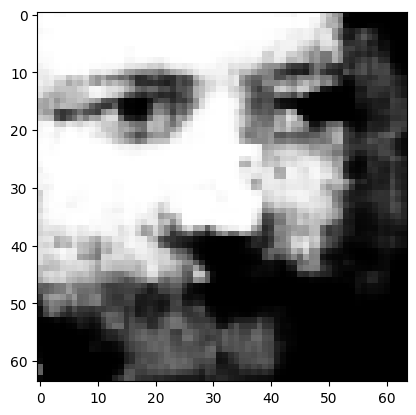

loss(generator):  836.9798400878906


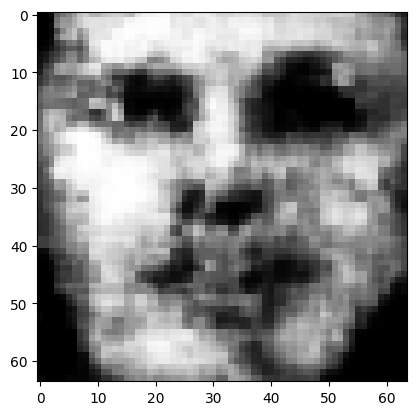

test loss:  837.0632102966308
loss(generator):  836.9595501708984
loss(generator):  836.9380740356445
loss(generator):  836.9174992370605
loss(generator):  836.8722248840332
loss(generator):  836.8611399841309
loss(generator):  836.8362704467773
loss(generator):  836.8161441040039
loss(generator):  836.7895640563964
loss(generator):  836.7631864929199
loss(generator):  836.7331053161621


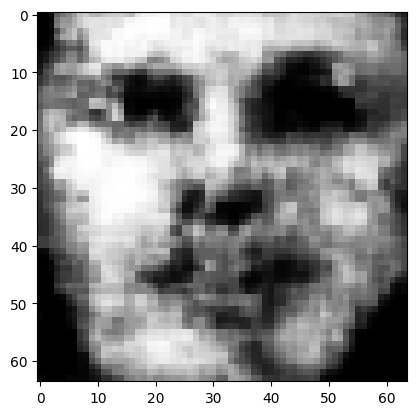

test loss:  836.7130081176758
loss(generator):  836.7175480651855
loss(generator):  836.6895597839356
loss(generator):  836.6655082702637
loss(generator):  836.6471221923828
loss(generator):  836.6272686767578
loss(generator):  836.5954139709472
loss(generator):  836.5848208618164
loss(generator):  836.5566400146485
loss(generator):  836.5293960571289


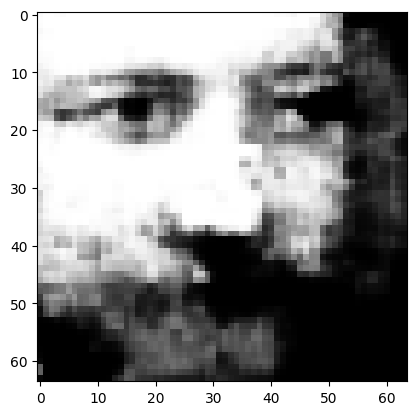

loss(generator):  836.5018907165527


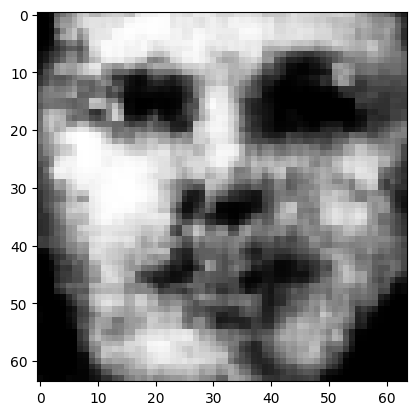

test loss:  836.3893534851074
loss(generator):  836.4876266479492
loss(generator):  836.4588439941406
loss(generator):  836.4355506896973
loss(generator):  836.4141525268554
loss(generator):  836.3856231689454
loss(generator):  836.3666134643555
loss(generator):  836.3448420715332
loss(generator):  836.327435760498
loss(generator):  836.2944683837891
loss(generator):  836.2782200622559


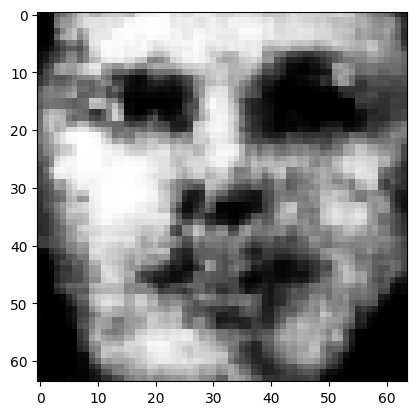

test loss:  836.0815692138672
loss(generator):  836.2580688476562
loss(generator):  836.238549194336
loss(generator):  836.2092880249023
loss(generator):  836.1831686401367
loss(generator):  836.161653137207
loss(generator):  836.144012145996
loss(generator):  836.120710144043
loss(generator):  836.0995872497558
loss(generator):  836.0739468383789


In [12]:
train_VAE(100, 0.0000005, 0.00001, 0.995)

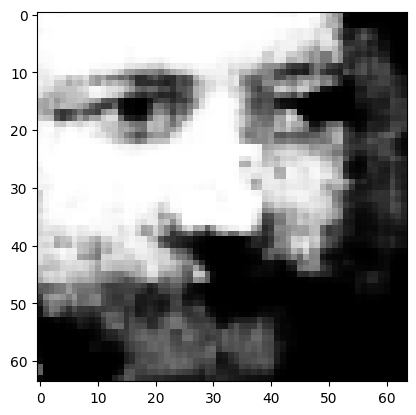

loss(generator):  836.0542749023438


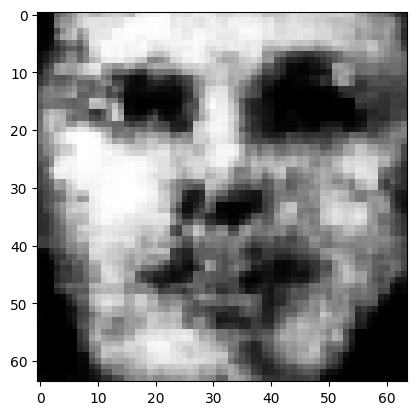

test loss:  2400.8121005249022
loss(generator):  836.0348002624512
loss(generator):  836.0069789123535
loss(generator):  835.9848551940918
loss(generator):  835.9648109436035
loss(generator):  835.9525205993652
loss(generator):  835.9176371765137
loss(generator):  835.910115814209
loss(generator):  835.8831039428711
loss(generator):  835.8681488037109
loss(generator):  835.8454814147949


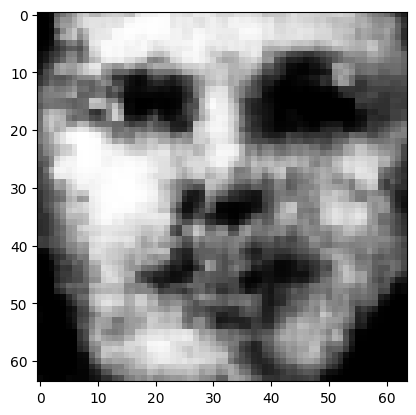

test loss:  2400.265312194824
loss(generator):  835.8191876220703
loss(generator):  835.7921269226074
loss(generator):  835.7807460021972
loss(generator):  835.7645028686524
loss(generator):  835.7403533935546
loss(generator):  835.7199291992188
loss(generator):  835.6982386779786
loss(generator):  835.6812532043457
loss(generator):  835.6585131835938


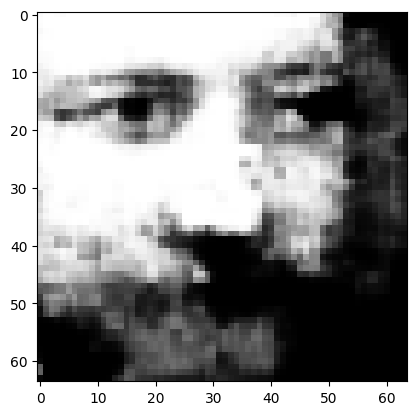

loss(generator):  835.6449249267578


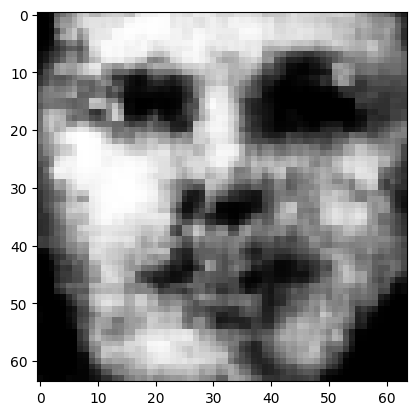

test loss:  2399.6926959228517
loss(generator):  835.6206759643554
loss(generator):  835.6086671447754
loss(generator):  835.5865144348145
loss(generator):  835.5613195800781
loss(generator):  835.5440438842774
loss(generator):  835.5303952026367
loss(generator):  835.5064520263672
loss(generator):  835.4874003601075
loss(generator):  835.4644221496582
loss(generator):  835.4472572326661


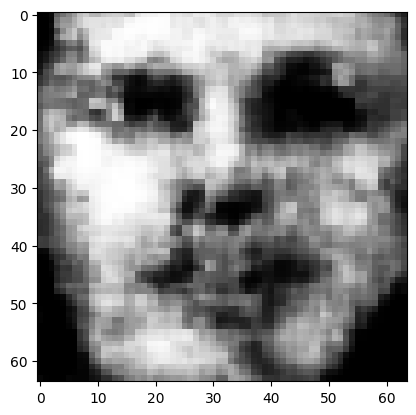

test loss:  2399.057788696289
loss(generator):  835.4302116394043
loss(generator):  835.4064924621582
loss(generator):  835.3963505554199
loss(generator):  835.3770697021484
loss(generator):  835.3504286193847
loss(generator):  835.3360246276856
loss(generator):  835.3194398498536
loss(generator):  835.2989790344238
loss(generator):  835.289235534668


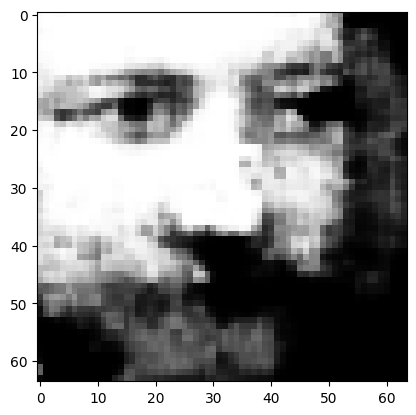

loss(generator):  835.2654981994629


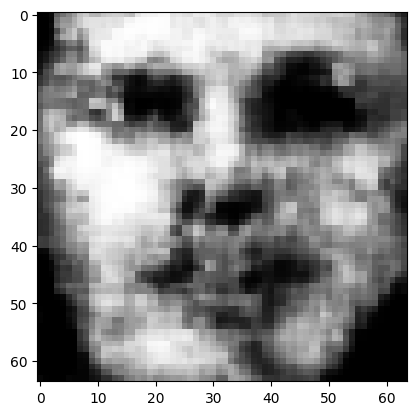

test loss:  2398.326793823242
loss(generator):  835.2535897827148
loss(generator):  835.2276930236817
loss(generator):  835.214401550293
loss(generator):  835.1941476440429
loss(generator):  835.1829632568359
loss(generator):  835.1652513122558
loss(generator):  835.1463432312012
loss(generator):  835.1251625061035
loss(generator):  835.1068684387207
loss(generator):  835.092791595459


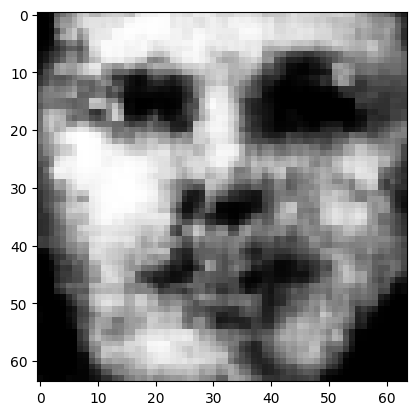

test loss:  2398.1909869384767
loss(generator):  835.0708128356933
loss(generator):  835.0598237609863
loss(generator):  835.0424971008301
loss(generator):  835.0213630676269
loss(generator):  835.0092158508301
loss(generator):  834.995548248291
loss(generator):  834.9716696166993
loss(generator):  834.9596746826172
loss(generator):  834.9447149658204


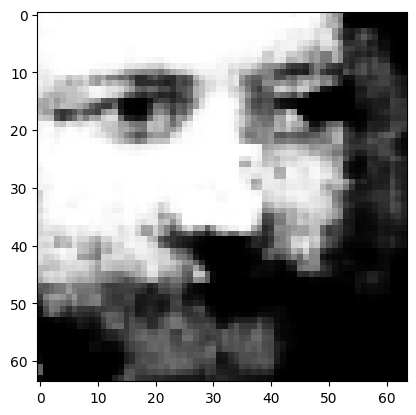

loss(generator):  834.9236265563965


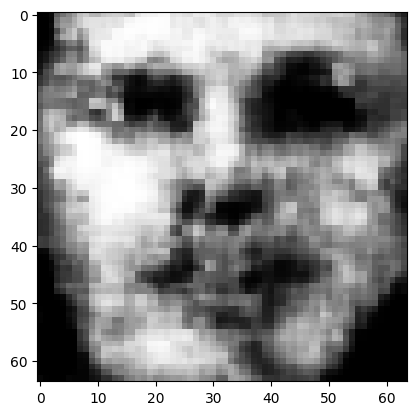

test loss:  2397.917147216797
loss(generator):  834.9110865783691
loss(generator):  834.8981741333008
loss(generator):  834.8786698913574
loss(generator):  834.8641592407226
loss(generator):  834.8419738769531
loss(generator):  834.8296321105958
loss(generator):  834.8162754821777
loss(generator):  834.7980970764161
loss(generator):  834.7796192932129
loss(generator):  834.7738760375977


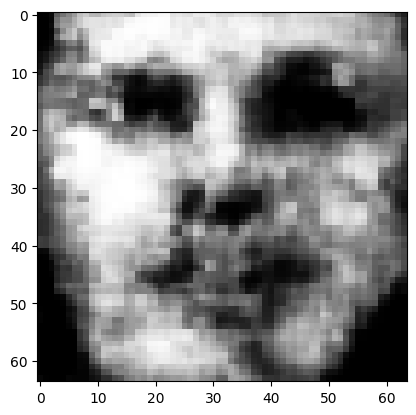

test loss:  2397.801711730957
loss(generator):  834.753395690918
loss(generator):  834.7333540344239
loss(generator):  834.7212322998047
loss(generator):  834.7017938232422
loss(generator):  834.6899391174317
loss(generator):  834.6764447021484
loss(generator):  834.6590588378906
loss(generator):  834.6444921875
loss(generator):  834.6284396362305


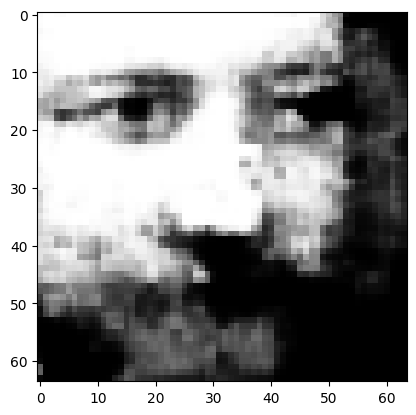

loss(generator):  834.6169227600097


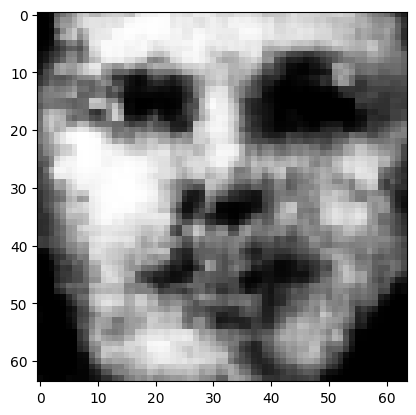

test loss:  2397.7103524780273
loss(generator):  834.6004235839844
loss(generator):  834.5857936096191
loss(generator):  834.5693907165528
loss(generator):  834.5580961608887
loss(generator):  834.540857849121
loss(generator):  834.5286106872559
loss(generator):  834.5110725402832
loss(generator):  834.4975065612794
loss(generator):  834.4823606872559
loss(generator):  834.468099822998


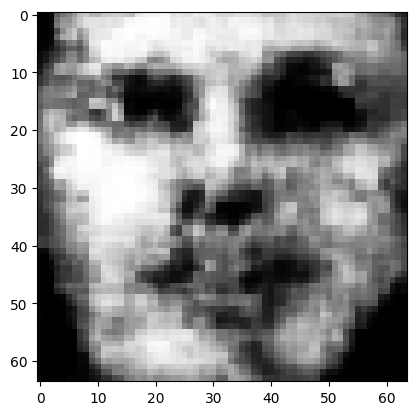

test loss:  2397.2527059936524
loss(generator):  834.4564036560058
loss(generator):  834.4426147460938
loss(generator):  834.4243145751954
loss(generator):  834.4165217590332
loss(generator):  834.3989773559571
loss(generator):  834.3846922302246
loss(generator):  834.3678855895996
loss(generator):  834.3556509399414
loss(generator):  834.3387245178222


In [47]:
train_VAE(100, 0.0000003, 0.00001, 0.995)

In [48]:
encoder(train_data[198])

tensor([[ 0.6887, -1.3750,  1.7748, -1.2173,  0.3226,  1.6335, -0.5273,  1.6291,
          0.7936, -0.8894, -3.1041, -1.1101,  1.2915,  0.3095,  2.4502, -1.5098,
         -0.5489, -1.9292,  2.0151, -2.1102, -0.7168,  2.7638,  0.4503, -2.8514,
          1.7791, -0.3678,  0.5730, -0.1897,  2.1523, -4.1496, -2.0523,  0.3164,
          3.1230, -0.3251, -0.0157,  1.1036,  0.8067,  1.0224,  1.1519, -1.7675,
          1.7913, -3.3364,  4.7199,  1.8429,  0.8211,  2.9306,  4.0063, -2.8779,
          1.2500,  0.3924,  1.6927, -2.6636,  1.9510,  0.5624, -0.6150, -1.6212,
          0.1856, -0.8856,  4.6191, -3.8503,  3.5332, -2.2146, -0.9012,  2.8337]],
       device='cuda:3', grad_fn=<AddmmBackward>)

In [49]:
encoder(train_data[199]).shape

torch.Size([1, 64])

In [50]:
decoder(torch.normal(0, 1, size=(1,64)).to(device))

tensor([[[[-0.9931, -0.9940, -0.9767,  ..., -0.9988, -0.9997, -0.9995],
          [-0.9987, -0.9986, -0.9915,  ..., -0.9999, -1.0000, -1.0000],
          [-0.9984, -0.9963, -0.9830,  ..., -0.9998, -1.0000, -1.0000],
          ...,
          [-0.9994, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9938, -0.9998, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9442, -0.9990, -0.9999,  ..., -1.0000, -1.0000, -1.0000]]]],
       device='cuda:3', grad_fn=<TanhBackward>)

In [51]:
decoder(encoder(train_data[199]))

tensor([[[[-0.9956, -0.9949, -0.9745,  ..., -0.2653, -0.5747, -0.7661],
          [-0.9993, -0.9993, -0.9931,  ...,  0.0686, -0.3105, -0.6267],
          [-0.9992, -0.9986, -0.9904,  ...,  0.1493, -0.2105, -0.5470],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.9895, -0.9980, -0.9985],
          [-0.9993, -1.0000, -1.0000,  ..., -0.9942, -0.9991, -0.9989],
          [-0.9442, -0.9995, -0.9999,  ..., -0.9887, -0.9967, -0.9933]]]],
       device='cuda:3', grad_fn=<TanhBackward>)

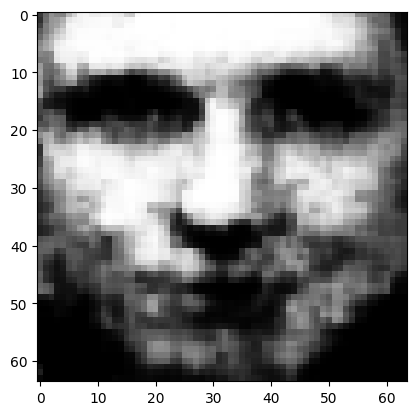

In [52]:
tensor_to_picture(decoder(encoder(test_data[84])).detach().cpu().numpy()[0][0])

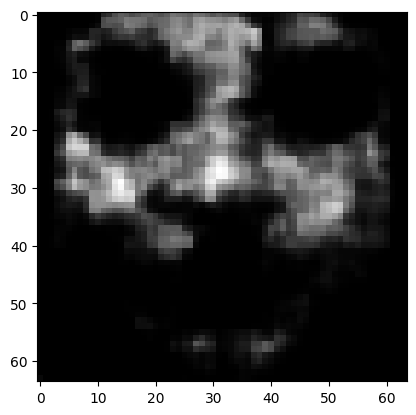

In [64]:
tensor_to_picture(decoder(torch.normal(0, 1, size=(1,64)).to(device)).detach().cpu().numpy()[0][0])

In [61]:
z = 0
for i in range(train_data.shape[0]):
    z += encoder(train_data[i])
z = z/train_data.shape[0]


In [62]:
z

tensor([[-1.1372, -0.0132,  0.7626,  1.6067,  1.1768,  1.1282, -0.8425,  0.3515,
          0.0316, -0.9363, -0.2092,  0.3770, -1.2080,  0.5347,  0.0050,  0.2629,
          1.3908,  0.1467,  1.1047, -0.4159, -0.6600,  1.3143, -0.4640,  0.7287,
         -0.2395,  1.6009, -0.0878,  0.2533, -0.1370,  1.1030, -0.5067,  0.8531,
         -0.6415, -0.5761, -1.0260,  0.2794, -0.5269,  0.5922, -0.8701,  1.1570,
          0.0633,  0.9107,  0.6680,  0.2228,  0.4140,  0.2073,  0.8432,  0.2497,
          0.4529, -1.2700,  0.2615,  0.3259, -0.3689, -0.1456,  0.4655, -0.3998,
         -0.3024, -0.7591,  0.1766,  0.5147, -0.2417, -0.4310, -0.3551, -0.8770]],
       device='cuda:3', grad_fn=<DivBackward0>)

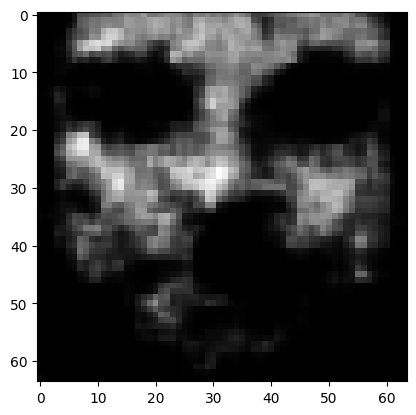

In [63]:
tensor_to_picture(decoder(z).detach().cpu().numpy()[0][0])

In [65]:
cpu = torch.device('cpu')
encoder = encoder.to(cpu)
decoder = decoder.to(cpu)
torch.save(encoder.state_dict(), 'train_VAE_last20encoder.pt')
torch.save(decoder.state_dict(), 'train_VAE_last20decoder.pt')